In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import math 
import os
import seaborn as sns
from datetime import timedelta 
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (13,8)

path = "C:\\Users\\giova\\QRM\\DATA_WEEK5"
files = os.listdir(path)
minutes = np.array([5, 10, 20])
print(files)
files = ["DATA_WEEK5/" + j for j in files]


['AAP.csv', 'ABC.csv', 'ACWI.csv', 'AES.csv', 'AKAM.csv', 'ALGN.csv', 'AMP.csv', 'AMZN.csv', 'ANSS.csv', 'ANTM.csv']


In [2]:

def get_rough(h, intra, delta):
    
    """
    for each h in H we calculate the estimated volatility approximating the integral 
    in the end we return a dictionary where for each h (key) we have the series of predicted next day vol
    """
    constant = np.cos( h * np.pi ) * delta**(h +0.5)/np.pi
    val = []
    for t in range(len(intra.index)):
        values = np.arange(0,t+1)
        est = ( np.log(intra.iloc[0:t+1]**2) / ((t + 1 - values + delta) *(t+1-values)**(h+0.5)) ).sum()
        #val.append( np.sqrt( np.exp( constant * est ) ) )
        val.append(constant * est)
        
    return val   


df = []
rolling_w = []
g_k = []
g_k_y_z = []
ret_c_c = []
rough = []
name = []
delta = [j for j in range(1, 51)]
Q = [0.5, 1, 1.5, 2, 3]
T = [10,20,100,200]

for file in files:
    if file.endswith(".csv"):
        df.append(pd.read_csv(file))   
        
        


                    last_mkt ticker          trade_time     bid     ask  \
trade_time                                                                
2015-01-02 09:46:00     NYSE    AAP 2015-01-02 09:46:00  160.63  160.84   
2015-01-02 09:56:00     NYSE    AAP 2015-01-02 09:56:00  161.07  161.27   
2015-01-02 10:06:00     NYSE    AAP 2015-01-02 10:06:00  161.70  161.83   
2015-01-02 10:16:00     NYSE    AAP 2015-01-02 10:16:00  162.36  162.46   
2015-01-02 10:26:00     NYSE    AAP 2015-01-02 10:26:00  161.92  162.01   
...                      ...    ...                 ...     ...     ...   
2021-10-20 13:38:01      IEX    AAP 2021-10-20 13:38:01  227.30  227.51   
2021-10-20 13:48:01     FNRA    AAP 2021-10-20 13:48:01  227.24  227.41   
2021-10-20 13:58:01     FNRA    AAP 2021-10-20 13:58:01  227.11  227.32   
2021-10-20 14:08:01     FNRA    AAP 2021-10-20 14:08:01  227.35  227.47   
2021-10-20 14:18:01     FNRA    AAP 2021-10-20 14:18:01  227.32  227.45   

                     vol

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


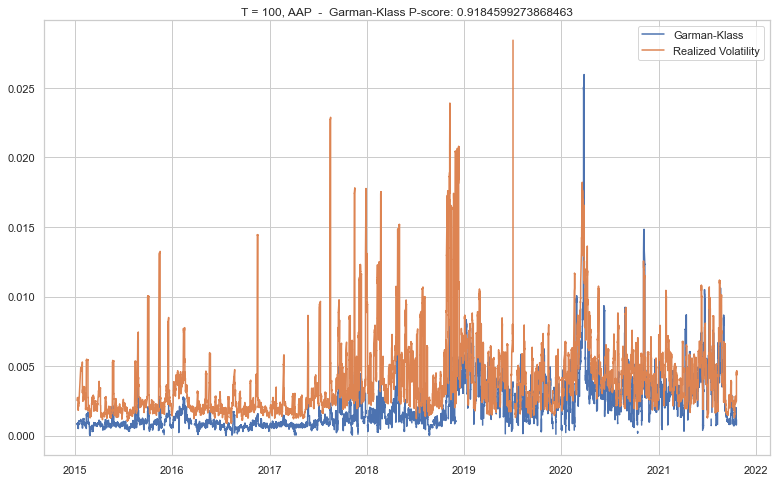

T = 100, H = 0.01, AAP  -  RoughVolatility P-score: 0.9034641757304721


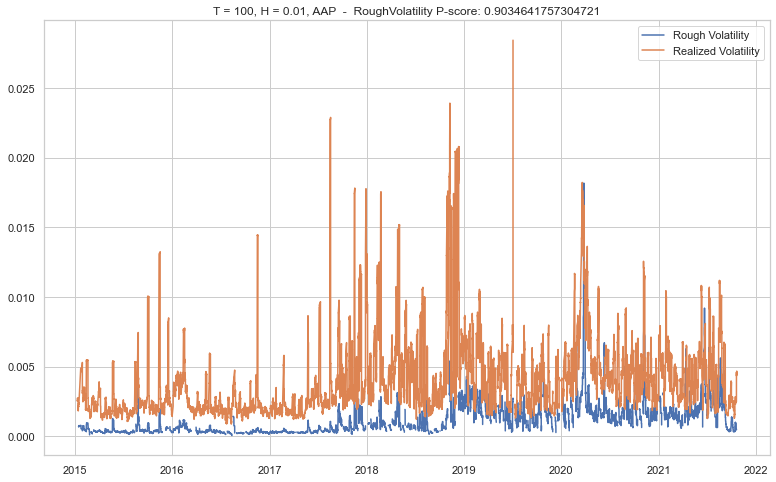

T = 100, H = 0.05, AAP  -  RoughVolatility P-score: 0.8922628555011324


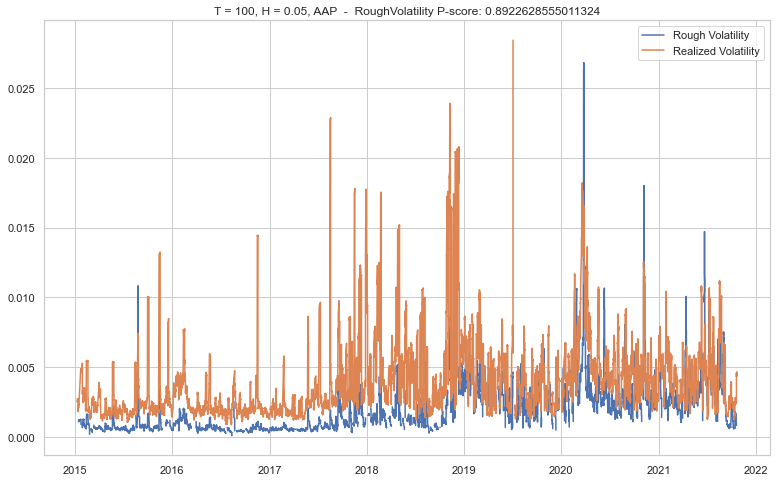

T = 100, H = 0.1, AAP  -  RoughVolatility P-score: 1.3801447861897196


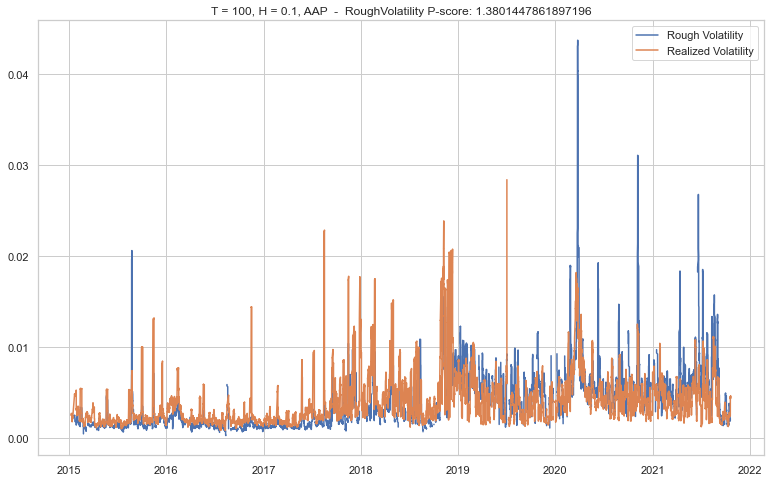

T = 100, H = 0.2, AAP  -  RoughVolatility P-score: 13.833916790330491


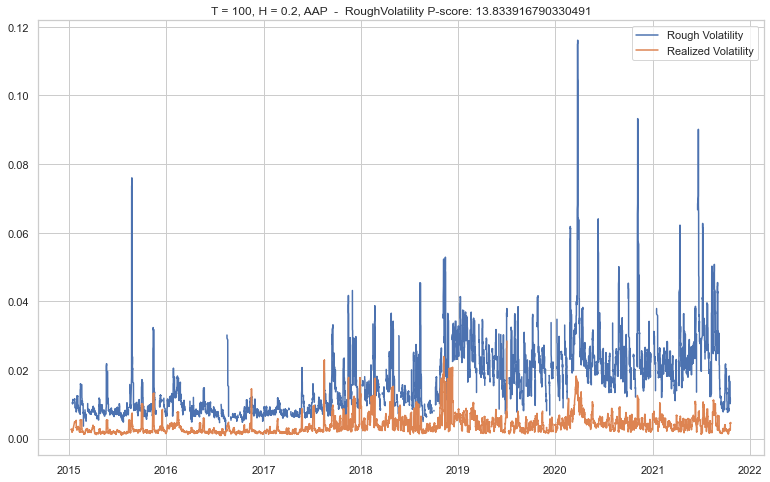

T = 100, H = 0.5, AAP  -  RoughVolatility P-score: 27043.98360922026


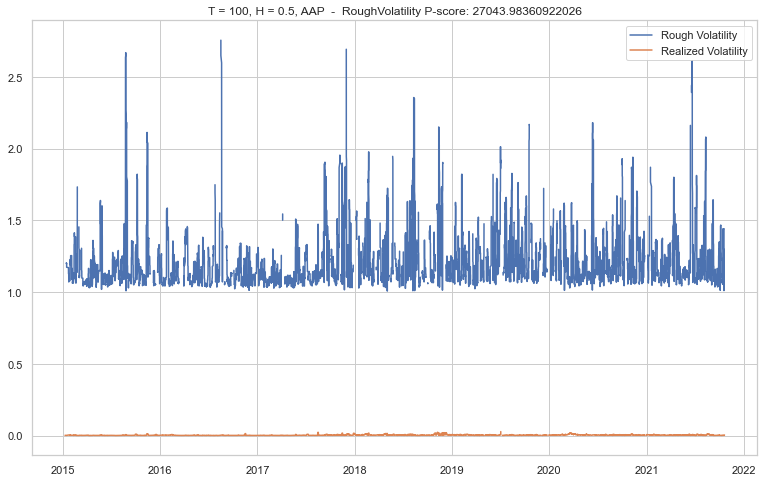

T = 100, H = 1, AAP  -  RoughVolatility P-score: 18042911.568475727


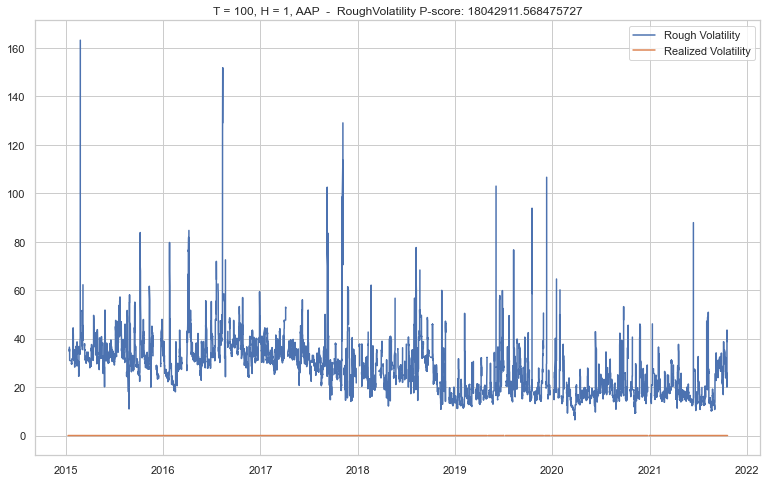

  Ticker    T Estimator     h       P-score
0    AAP  100       G-K     -  9.184599e-01
1    AAP  100     Rough  0.01  9.034642e-01
2    AAP  100     Rough  0.05  8.922629e-01
3    AAP  100     Rough   0.1  1.380145e+00
4    AAP  100     Rough   0.2  1.383392e+01
5    AAP  100     Rough   0.5  2.704398e+04
6    AAP  100     Rough     1  1.804291e+07
                    last_mkt ticker          trade_time     bid     ask  \
trade_time                                                                
2015-01-02 09:46:00     NYSE    ABC 2015-01-02 09:46:00   90.90   90.93   
2015-01-02 09:56:00     NYSE    ABC 2015-01-02 09:56:00   91.24   91.27   
2015-01-02 10:06:00     NYSE    ABC 2015-01-02 10:06:00   91.14   91.17   
2015-01-02 10:16:00     NYSE    ABC 2015-01-02 10:16:00   91.12   91.15   
2015-01-02 10:26:00     NYSE    ABC 2015-01-02 10:26:00   91.04   91.07   
...                      ...    ...                 ...     ...     ...   
2021-10-20 13:40:01     FNRA    ABC 2021-10-20 1

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


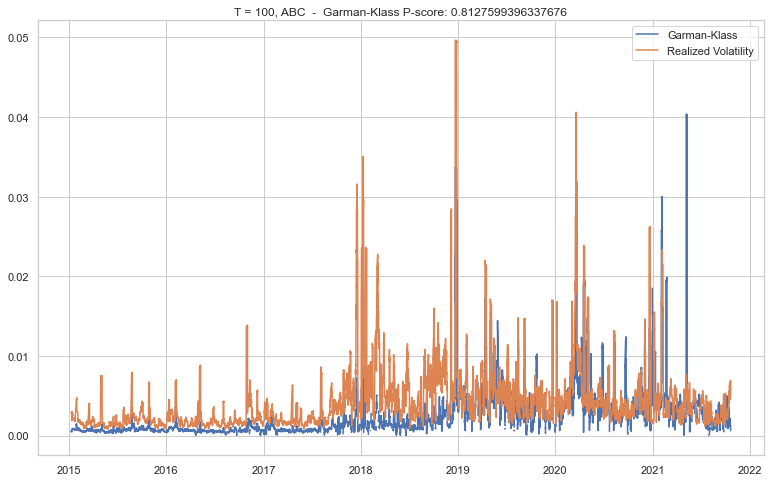

T = 100, H = 0.01, ABC  -  RoughVolatility P-score: 0.973803498190292


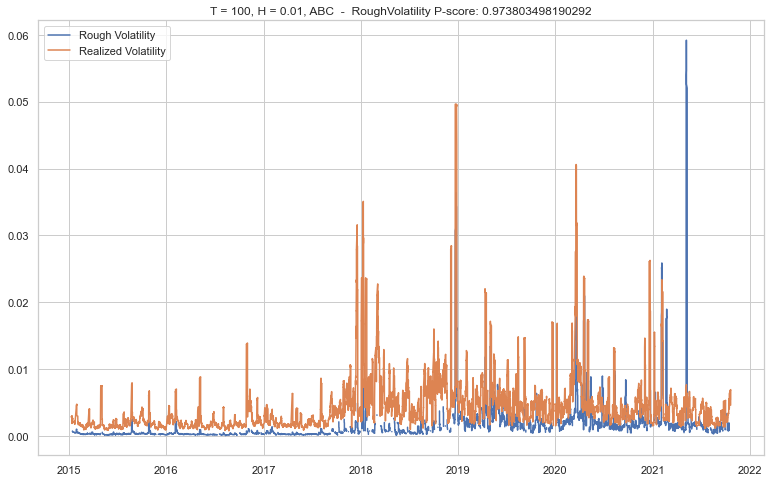

T = 100, H = 0.05, ABC  -  RoughVolatility P-score: 1.5709572696057432


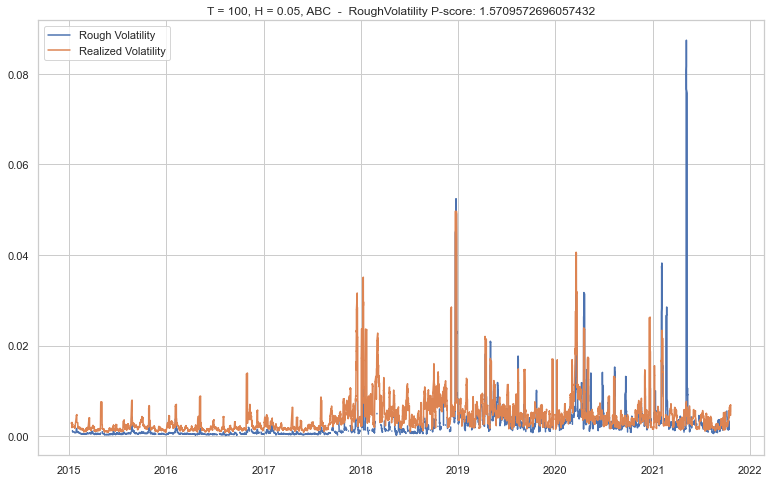

T = 100, H = 0.1, ABC  -  RoughVolatility P-score: 4.035404189679036


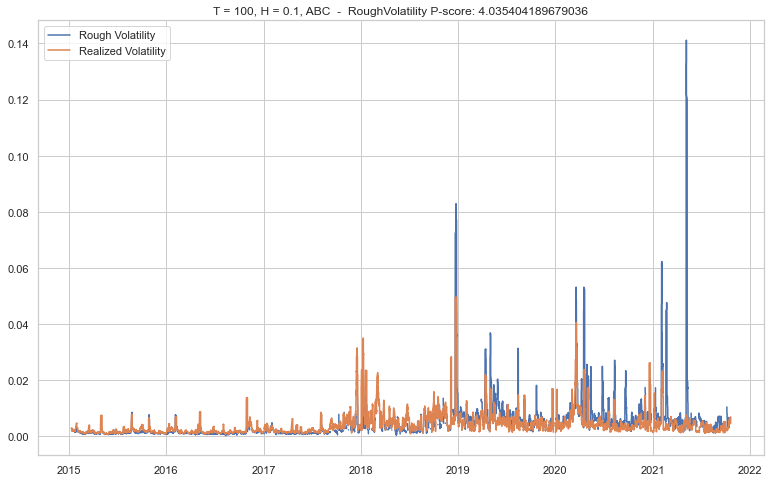

T = 100, H = 0.2, ABC  -  RoughVolatility P-score: 27.771178692714628


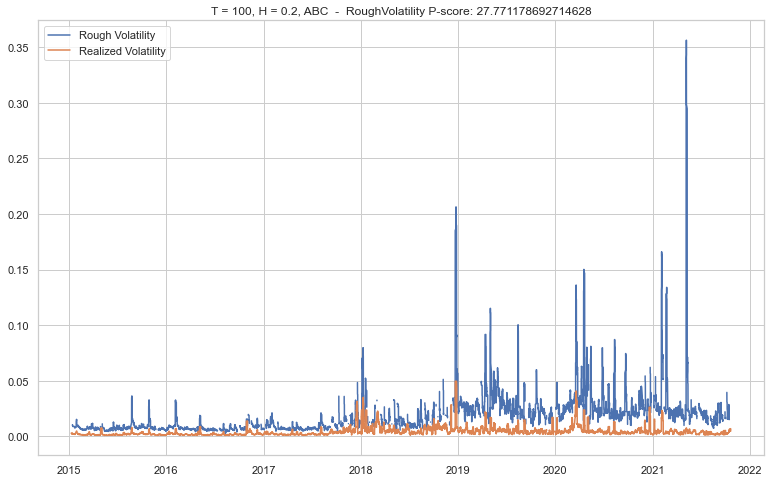

T = 100, H = 0.5, ABC  -  RoughVolatility P-score: 11716.20128200483


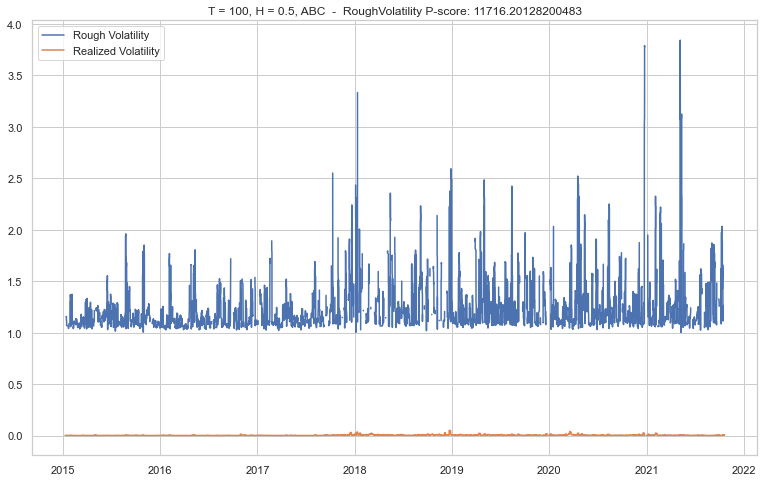

T = 100, H = 1, ABC  -  RoughVolatility P-score: 8965872.76352233


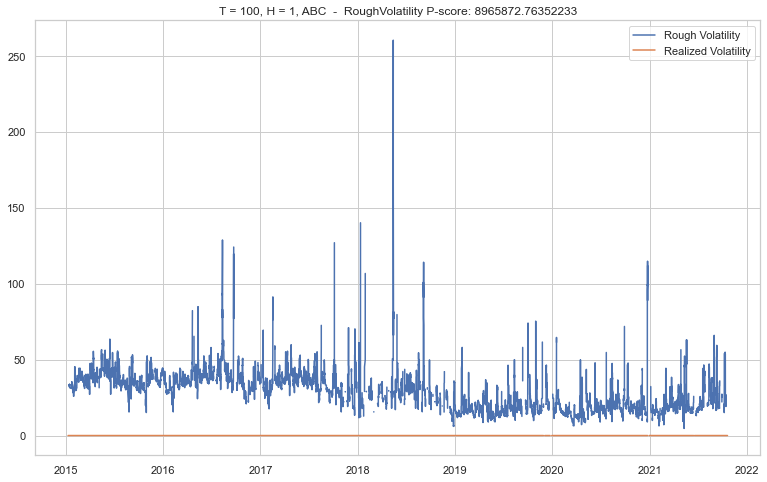

   Ticker    T Estimator     h       P-score
0     AAP  100       G-K     -  9.184599e-01
1     AAP  100     Rough  0.01  9.034642e-01
2     AAP  100     Rough  0.05  8.922629e-01
3     AAP  100     Rough   0.1  1.380145e+00
4     AAP  100     Rough   0.2  1.383392e+01
5     AAP  100     Rough   0.5  2.704398e+04
6     AAP  100     Rough     1  1.804291e+07
7     ABC  100       G-K     -  8.127599e-01
8     ABC  100     Rough  0.01  9.738035e-01
9     ABC  100     Rough  0.05  1.570957e+00
10    ABC  100     Rough   0.1  4.035404e+00
11    ABC  100     Rough   0.2  2.777118e+01
12    ABC  100     Rough   0.5  1.171620e+04
13    ABC  100     Rough     1  8.965873e+06
                    last_mkt ticker          trade_time     bid     ask  \
trade_time                                                                
2015-01-02 09:46:00      NMS   ACWI 2015-01-02 09:46:00   58.80   58.81   
2015-01-02 09:56:00      NMS   ACWI 2015-01-02 09:56:00   58.69   58.70   
2015-01-02 10:06:00      

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


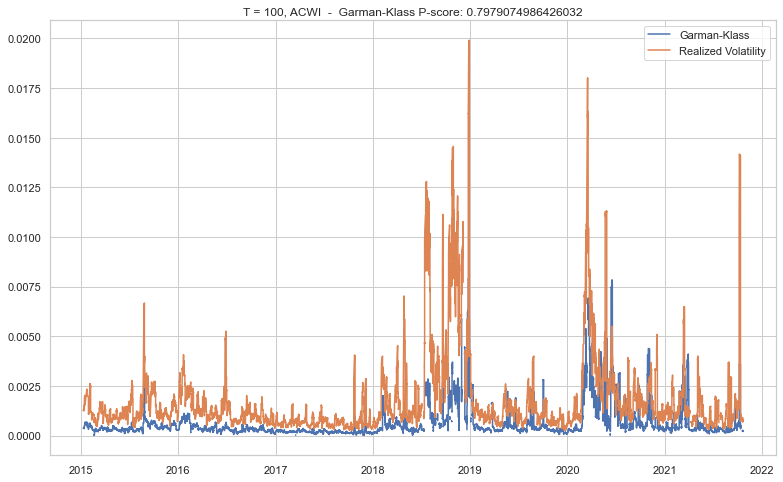

T = 100, H = 0.01, ACWI  -  RoughVolatility P-score: 0.724609294855893


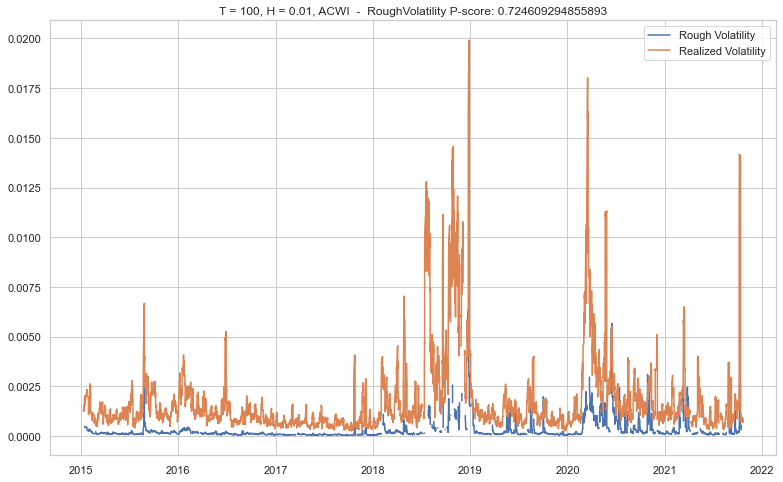

T = 100, H = 0.05, ACWI  -  RoughVolatility P-score: 0.6851171665545888


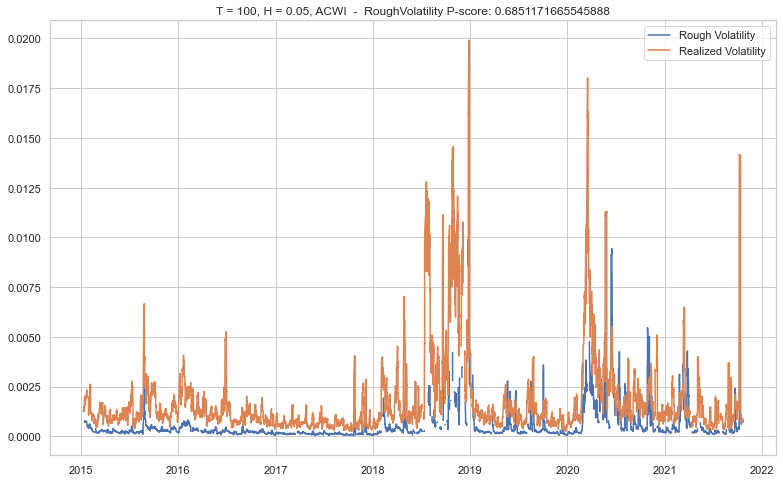

T = 100, H = 0.1, ACWI  -  RoughVolatility P-score: 0.6600406320035794


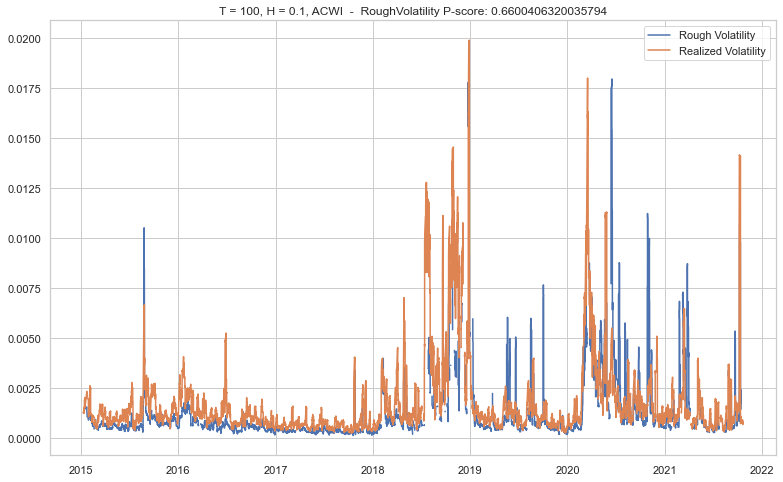

T = 100, H = 0.2, ACWI  -  RoughVolatility P-score: 8.371611999894546


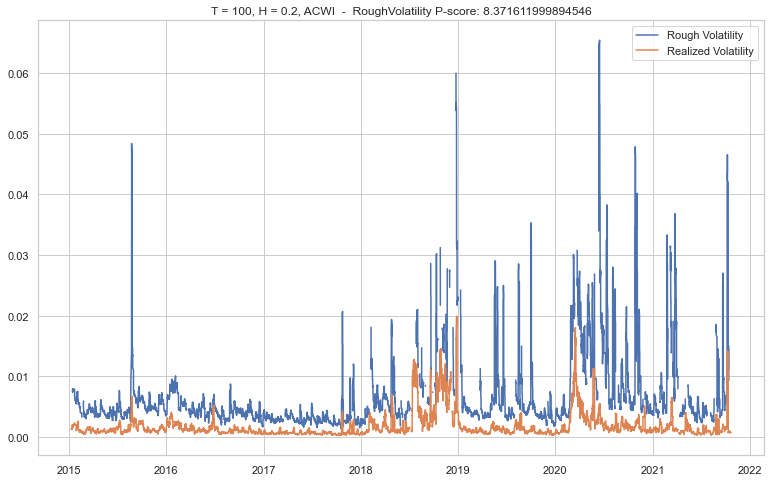

T = 100, H = 0.5, ACWI  -  RoughVolatility P-score: 59274.287842969796


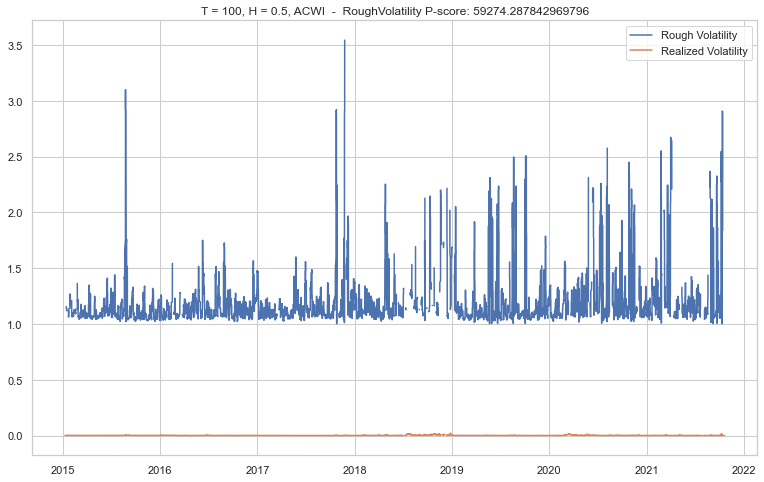

T = 100, H = 1, ACWI  -  RoughVolatility P-score: 178861170.24372983


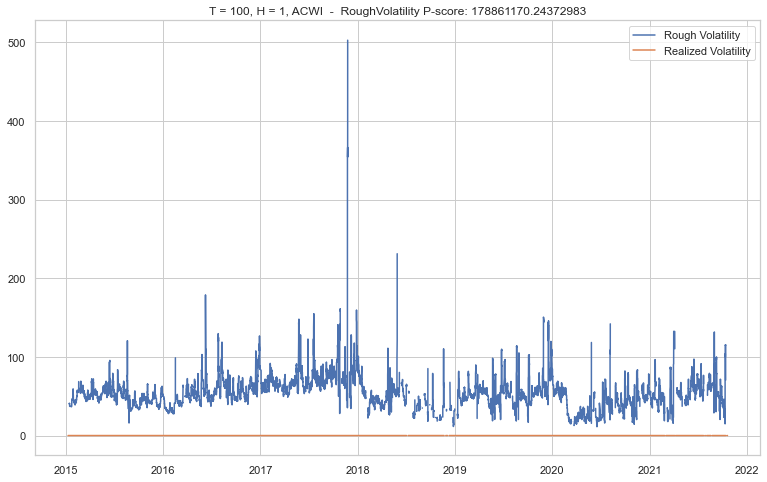

   Ticker    T Estimator     h       P-score
0     AAP  100       G-K     -  9.184599e-01
1     AAP  100     Rough  0.01  9.034642e-01
2     AAP  100     Rough  0.05  8.922629e-01
3     AAP  100     Rough   0.1  1.380145e+00
4     AAP  100     Rough   0.2  1.383392e+01
5     AAP  100     Rough   0.5  2.704398e+04
6     AAP  100     Rough     1  1.804291e+07
7     ABC  100       G-K     -  8.127599e-01
8     ABC  100     Rough  0.01  9.738035e-01
9     ABC  100     Rough  0.05  1.570957e+00
10    ABC  100     Rough   0.1  4.035404e+00
11    ABC  100     Rough   0.2  2.777118e+01
12    ABC  100     Rough   0.5  1.171620e+04
13    ABC  100     Rough     1  8.965873e+06
14   ACWI  100       G-K     -  7.979075e-01
15   ACWI  100     Rough  0.01  7.246093e-01
16   ACWI  100     Rough  0.05  6.851172e-01
17   ACWI  100     Rough   0.1  6.600406e-01
18   ACWI  100     Rough   0.2  8.371612e+00
19   ACWI  100     Rough   0.5  5.927429e+04
20   ACWI  100     Rough     1  1.788612e+08
          

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


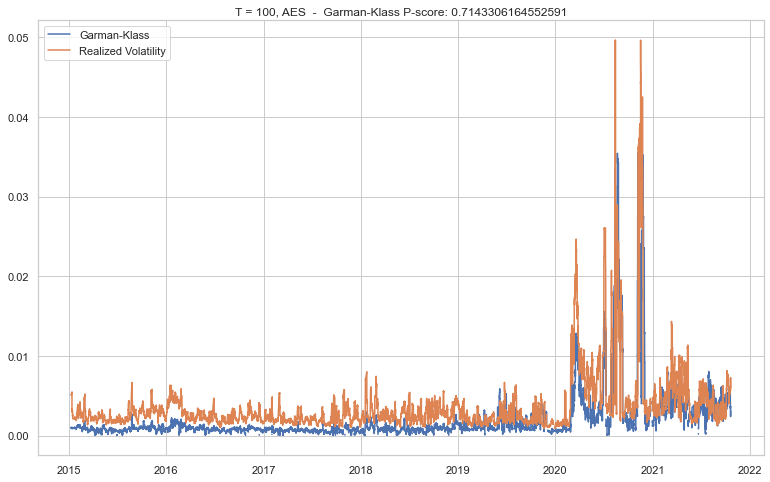

T = 100, H = 0.01, AES  -  RoughVolatility P-score: 0.8263450766483583


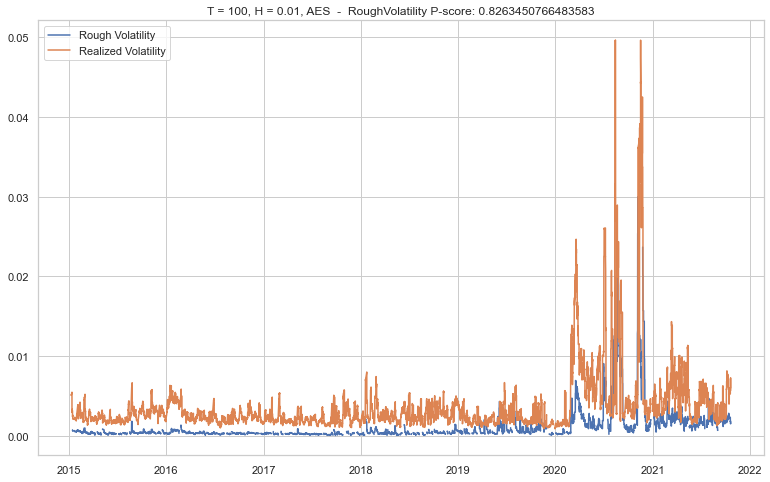

T = 100, H = 0.05, AES  -  RoughVolatility P-score: 0.761591456957887


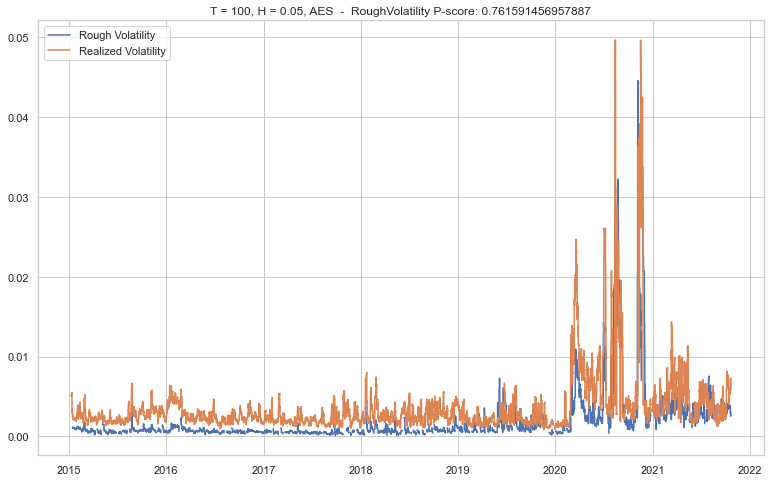

T = 100, H = 0.1, AES  -  RoughVolatility P-score: 1.1105445358435975


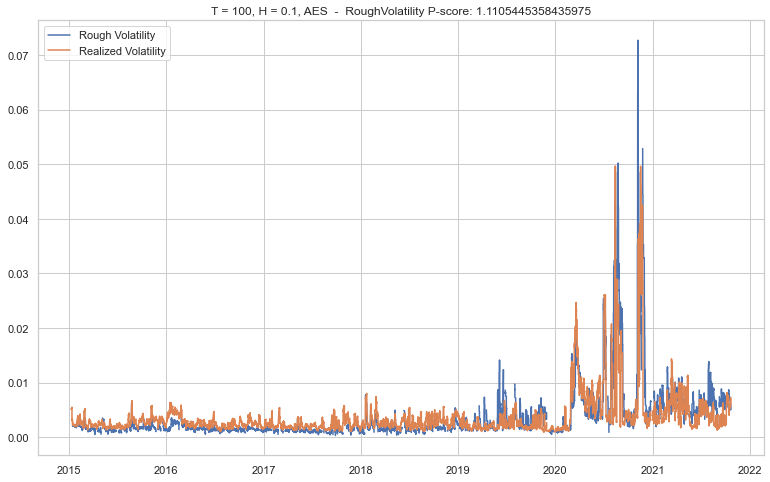

T = 100, H = 0.2, AES  -  RoughVolatility P-score: 9.169633392150159


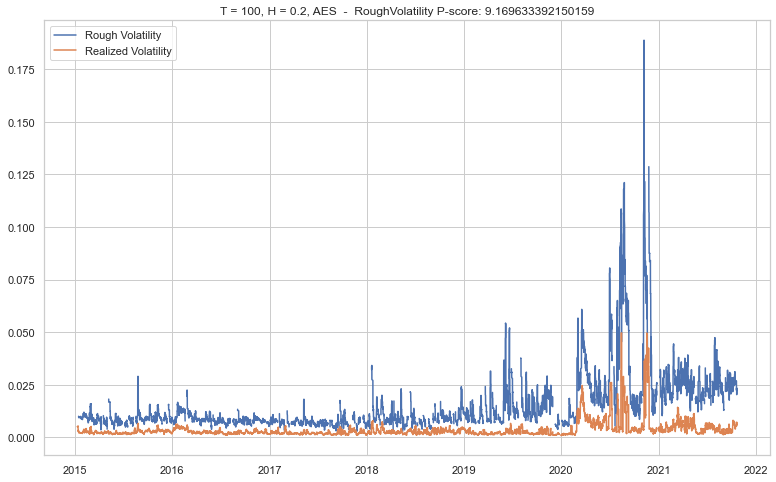

T = 100, H = 0.5, AES  -  RoughVolatility P-score: 10118.10786853664


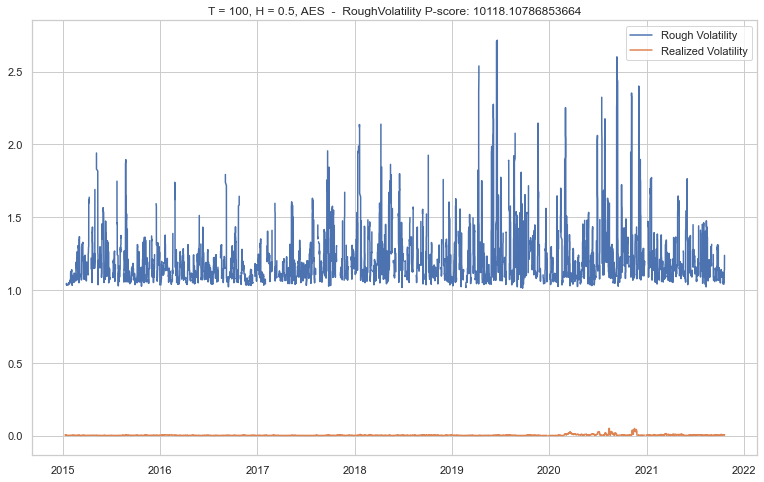

T = 100, H = 1, AES  -  RoughVolatility P-score: 10386101.875142327


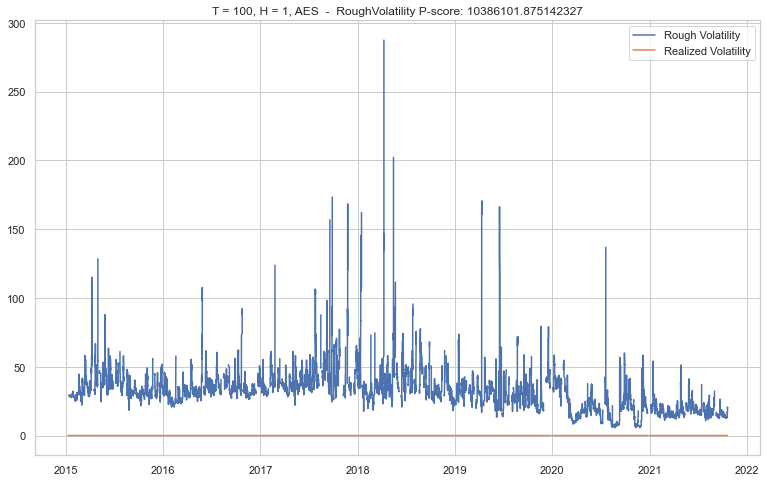

   Ticker    T Estimator     h       P-score
0     AAP  100       G-K     -  9.184599e-01
1     AAP  100     Rough  0.01  9.034642e-01
2     AAP  100     Rough  0.05  8.922629e-01
3     AAP  100     Rough   0.1  1.380145e+00
4     AAP  100     Rough   0.2  1.383392e+01
5     AAP  100     Rough   0.5  2.704398e+04
6     AAP  100     Rough     1  1.804291e+07
7     ABC  100       G-K     -  8.127599e-01
8     ABC  100     Rough  0.01  9.738035e-01
9     ABC  100     Rough  0.05  1.570957e+00
10    ABC  100     Rough   0.1  4.035404e+00
11    ABC  100     Rough   0.2  2.777118e+01
12    ABC  100     Rough   0.5  1.171620e+04
13    ABC  100     Rough     1  8.965873e+06
14   ACWI  100       G-K     -  7.979075e-01
15   ACWI  100     Rough  0.01  7.246093e-01
16   ACWI  100     Rough  0.05  6.851172e-01
17   ACWI  100     Rough   0.1  6.600406e-01
18   ACWI  100     Rough   0.2  8.371612e+00
19   ACWI  100     Rough   0.5  5.927429e+04
20   ACWI  100     Rough     1  1.788612e+08
21    AES 

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


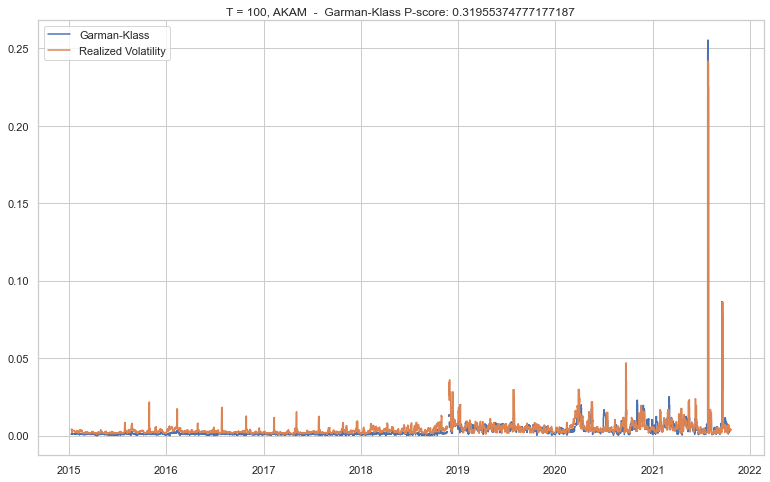

T = 100, H = 0.01, AKAM  -  RoughVolatility P-score: 3.7204931750581247


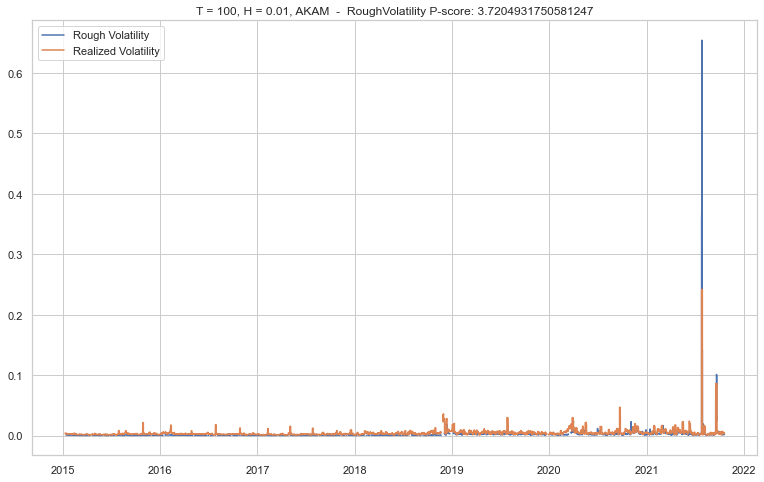

T = 100, H = 0.05, AKAM  -  RoughVolatility P-score: 6.759281078745933


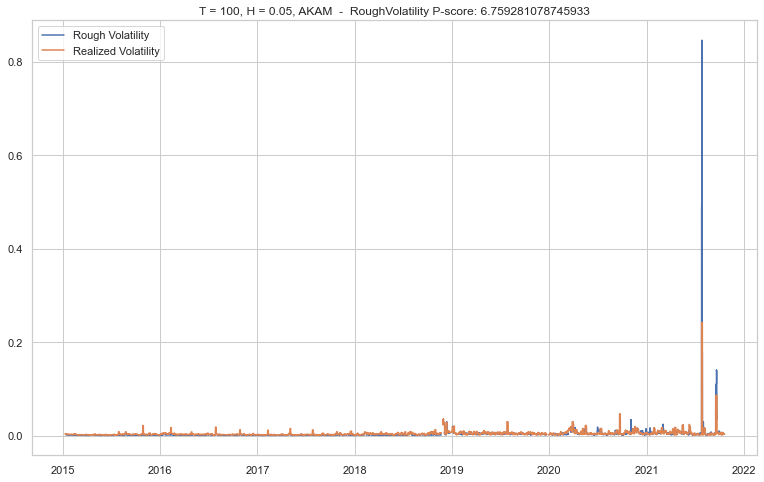

T = 100, H = 0.1, AKAM  -  RoughVolatility P-score: 12.91269273162737


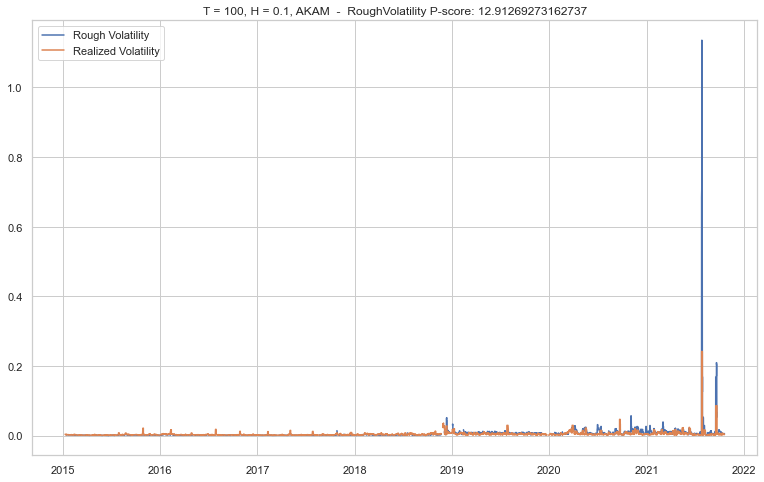

T = 100, H = 0.2, AKAM  -  RoughVolatility P-score: 38.275377415736706


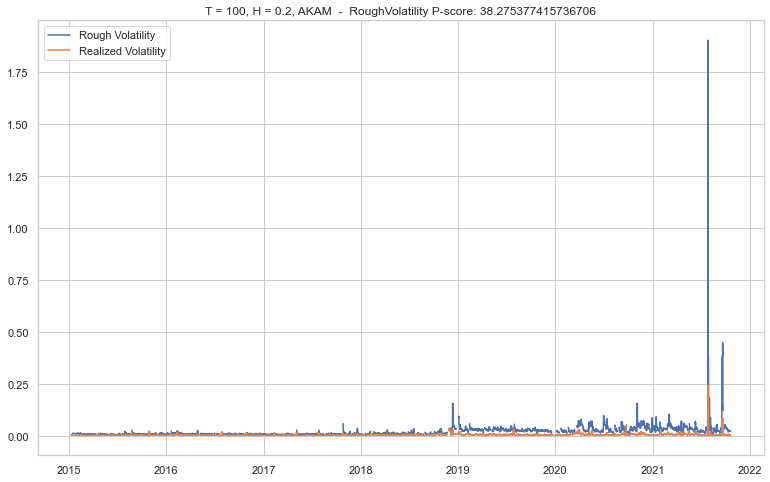

T = 100, H = 0.5, AKAM  -  RoughVolatility P-score: 915.9117572759104


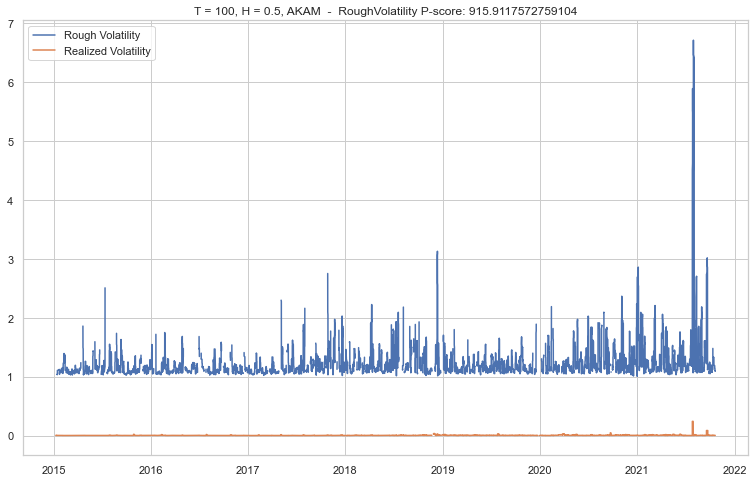

T = 100, H = 1, AKAM  -  RoughVolatility P-score: 568892.9881540387


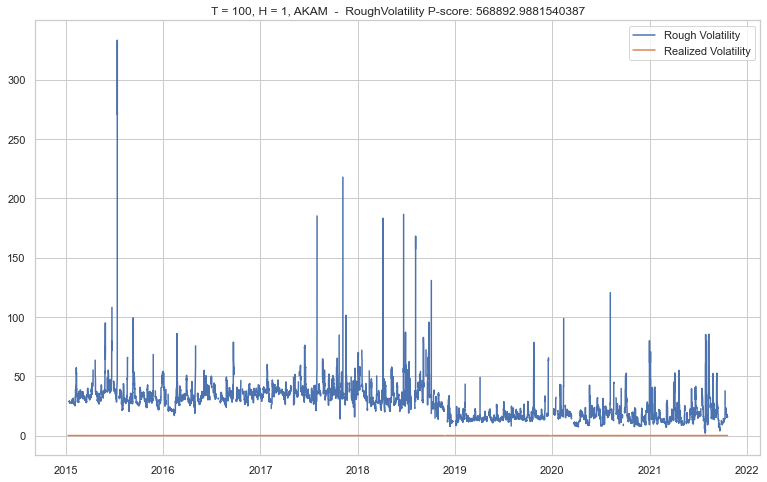

   Ticker    T Estimator     h       P-score
0     AAP  100       G-K     -  9.184599e-01
1     AAP  100     Rough  0.01  9.034642e-01
2     AAP  100     Rough  0.05  8.922629e-01
3     AAP  100     Rough   0.1  1.380145e+00
4     AAP  100     Rough   0.2  1.383392e+01
5     AAP  100     Rough   0.5  2.704398e+04
6     AAP  100     Rough     1  1.804291e+07
7     ABC  100       G-K     -  8.127599e-01
8     ABC  100     Rough  0.01  9.738035e-01
9     ABC  100     Rough  0.05  1.570957e+00
10    ABC  100     Rough   0.1  4.035404e+00
11    ABC  100     Rough   0.2  2.777118e+01
12    ABC  100     Rough   0.5  1.171620e+04
13    ABC  100     Rough     1  8.965873e+06
14   ACWI  100       G-K     -  7.979075e-01
15   ACWI  100     Rough  0.01  7.246093e-01
16   ACWI  100     Rough  0.05  6.851172e-01
17   ACWI  100     Rough   0.1  6.600406e-01
18   ACWI  100     Rough   0.2  8.371612e+00
19   ACWI  100     Rough   0.5  5.927429e+04
20   ACWI  100     Rough     1  1.788612e+08
21    AES 

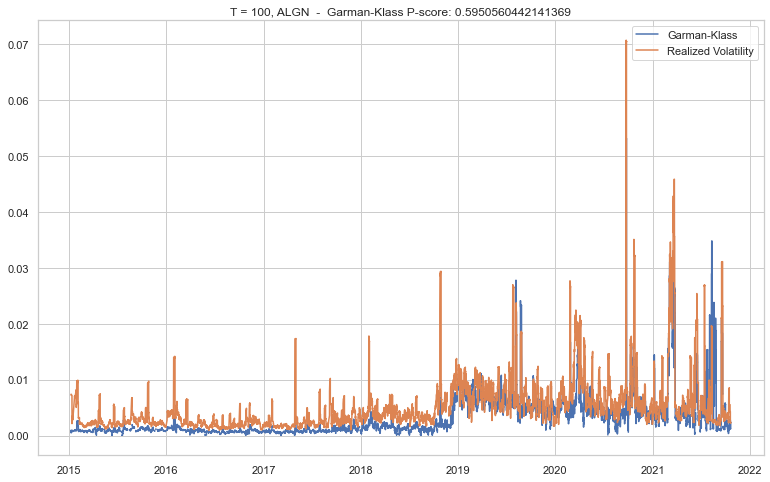

T = 100, H = 0.01, ALGN  -  RoughVolatility P-score: 0.6644807308373164


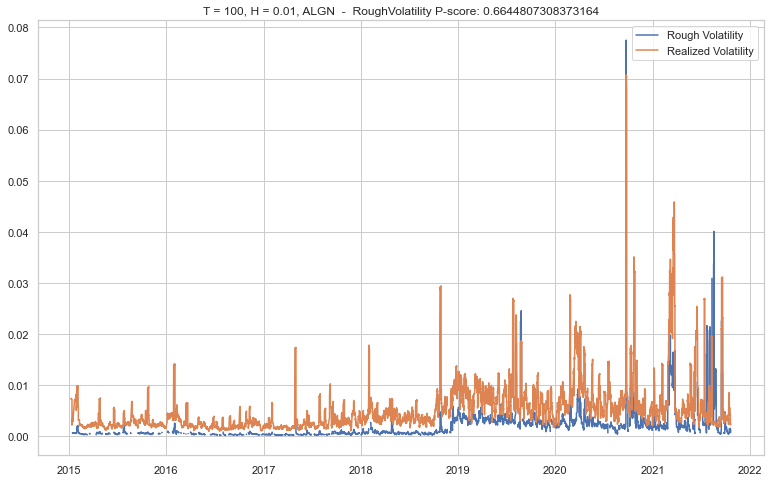

T = 100, H = 0.05, ALGN  -  RoughVolatility P-score: 0.9842099370741313


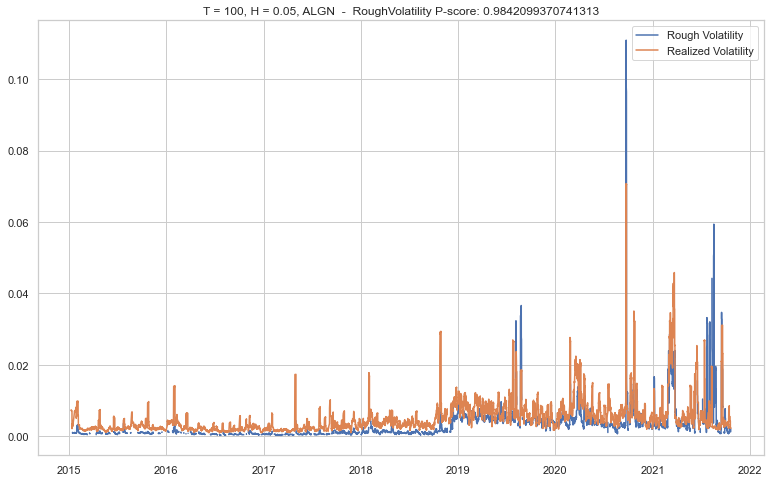

T = 100, H = 0.1, ALGN  -  RoughVolatility P-score: 3.007034069873642


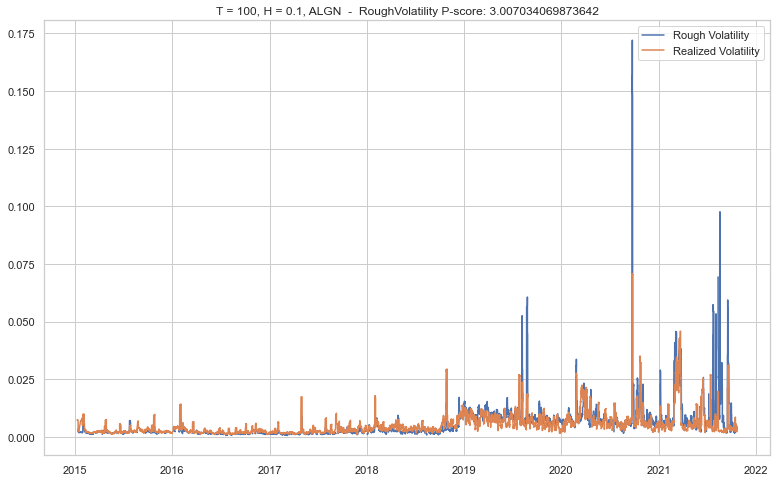

T = 100, H = 0.2, ALGN  -  RoughVolatility P-score: 21.238463119423184


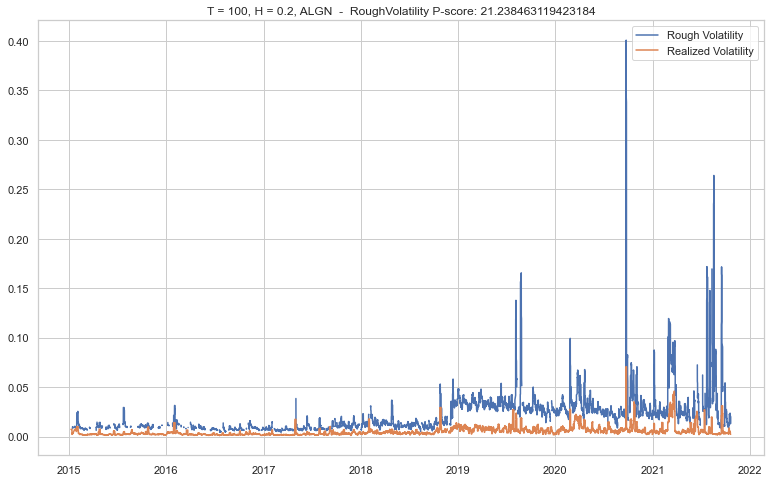

T = 100, H = 0.5, ALGN  -  RoughVolatility P-score: 7075.8565386682985


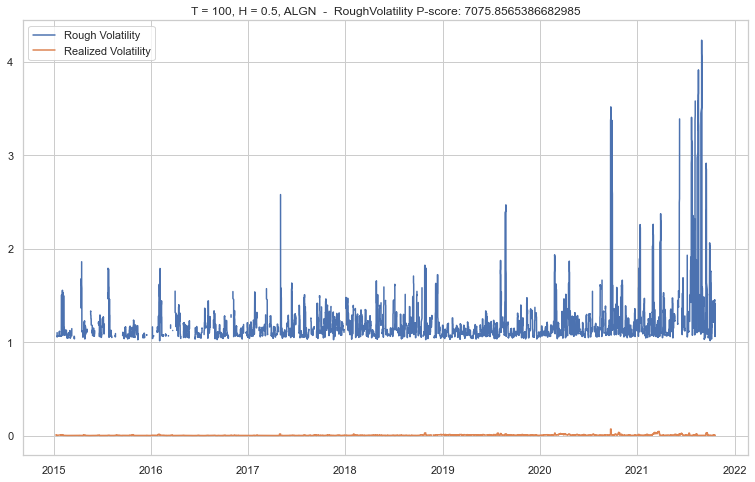

T = 100, H = 1, ALGN  -  RoughVolatility P-score: 4135342.6773538594


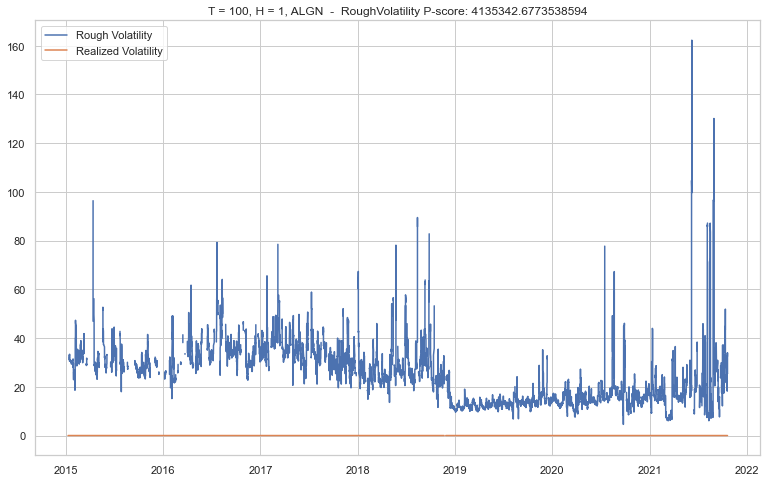

   Ticker    T Estimator     h       P-score
0     AAP  100       G-K     -  9.184599e-01
1     AAP  100     Rough  0.01  9.034642e-01
2     AAP  100     Rough  0.05  8.922629e-01
3     AAP  100     Rough   0.1  1.380145e+00
4     AAP  100     Rough   0.2  1.383392e+01
5     AAP  100     Rough   0.5  2.704398e+04
6     AAP  100     Rough     1  1.804291e+07
7     ABC  100       G-K     -  8.127599e-01
8     ABC  100     Rough  0.01  9.738035e-01
9     ABC  100     Rough  0.05  1.570957e+00
10    ABC  100     Rough   0.1  4.035404e+00
11    ABC  100     Rough   0.2  2.777118e+01
12    ABC  100     Rough   0.5  1.171620e+04
13    ABC  100     Rough     1  8.965873e+06
14   ACWI  100       G-K     -  7.979075e-01
15   ACWI  100     Rough  0.01  7.246093e-01
16   ACWI  100     Rough  0.05  6.851172e-01
17   ACWI  100     Rough   0.1  6.600406e-01
18   ACWI  100     Rough   0.2  8.371612e+00
19   ACWI  100     Rough   0.5  5.927429e+04
20   ACWI  100     Rough     1  1.788612e+08
21    AES 

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


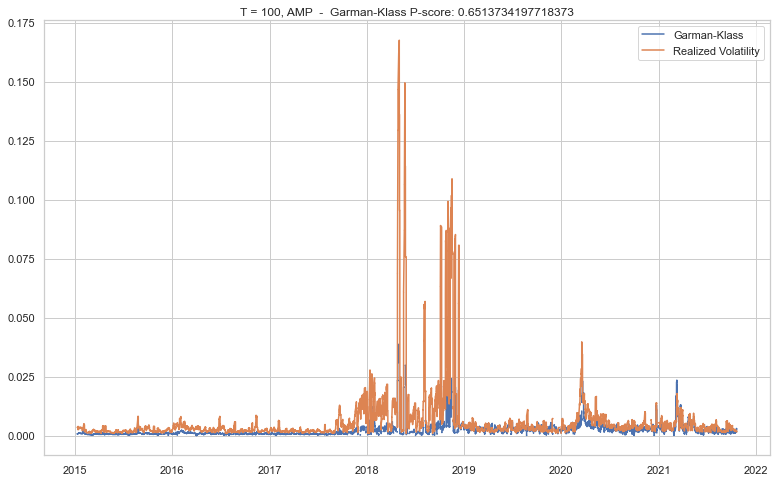

T = 100, H = 0.01, AMP  -  RoughVolatility P-score: 0.46033729207445895


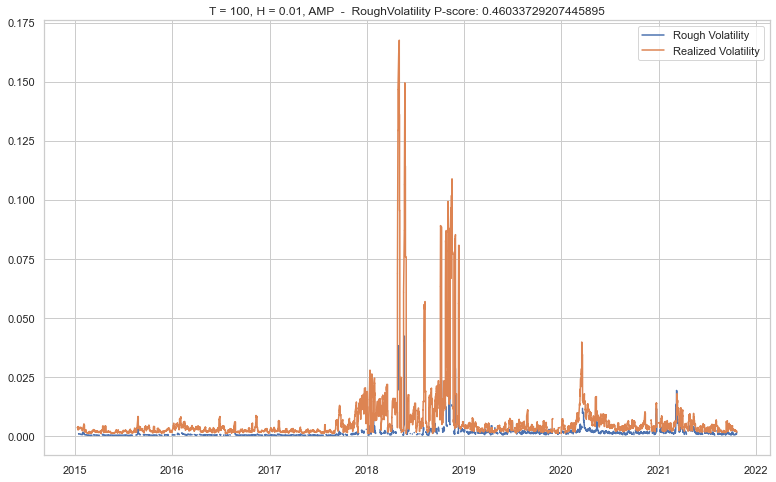

T = 100, H = 0.05, AMP  -  RoughVolatility P-score: 0.42889814826688744


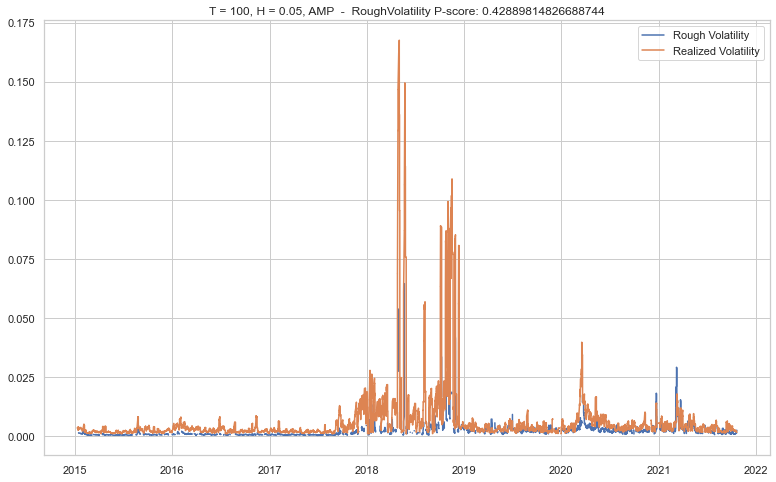

T = 100, H = 0.1, AMP  -  RoughVolatility P-score: 0.35849277531559165


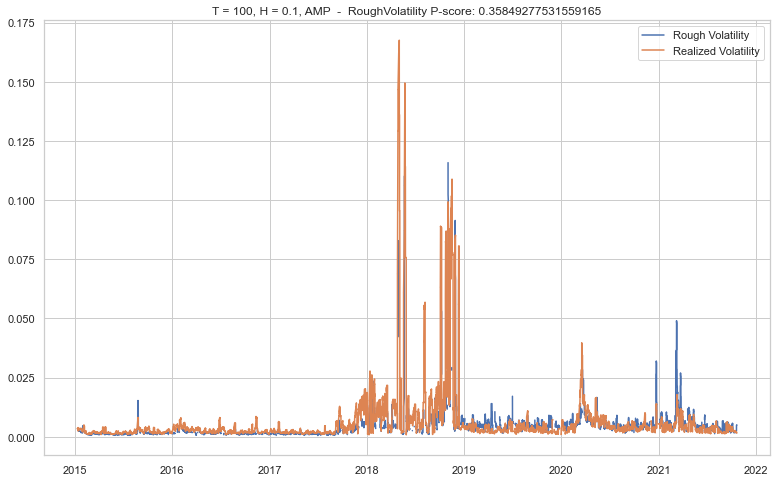

T = 100, H = 0.2, AMP  -  RoughVolatility P-score: 1.4444463417793902


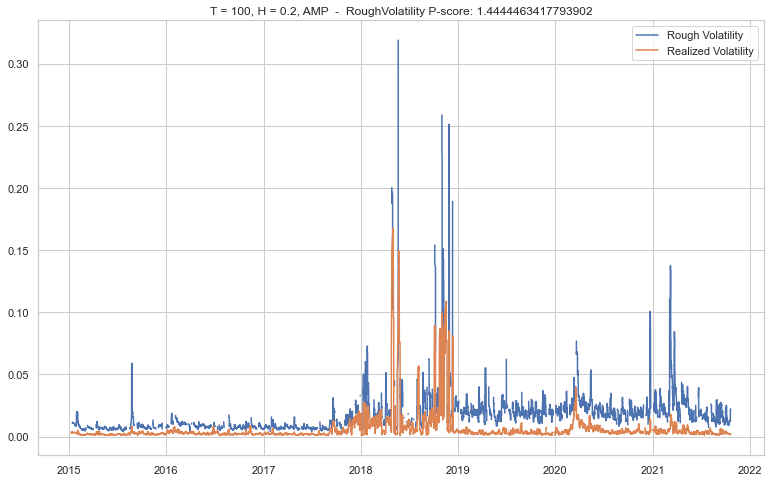

T = 100, H = 0.5, AMP  -  RoughVolatility P-score: 1190.521622167277


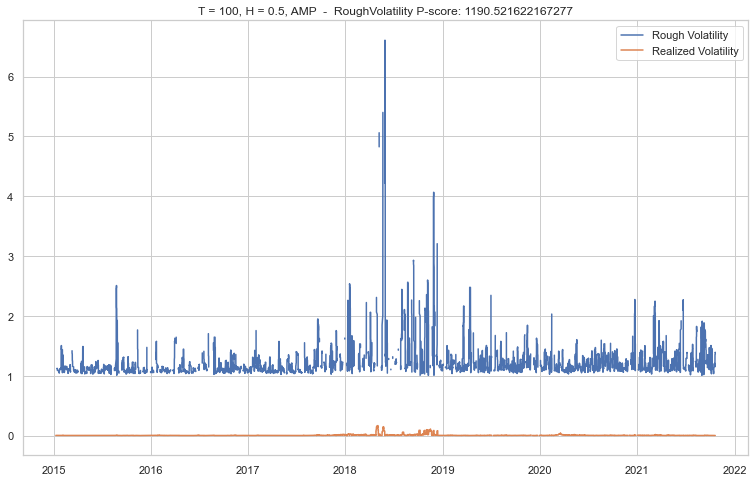

T = 100, H = 1, AMP  -  RoughVolatility P-score: 1005911.2142782904


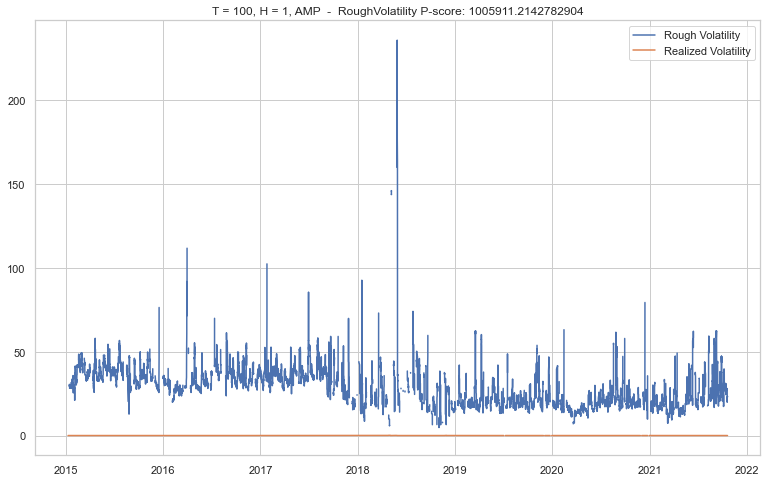

   Ticker    T Estimator     h       P-score
0     AAP  100       G-K     -  9.184599e-01
1     AAP  100     Rough  0.01  9.034642e-01
2     AAP  100     Rough  0.05  8.922629e-01
3     AAP  100     Rough   0.1  1.380145e+00
4     AAP  100     Rough   0.2  1.383392e+01
5     AAP  100     Rough   0.5  2.704398e+04
6     AAP  100     Rough     1  1.804291e+07
7     ABC  100       G-K     -  8.127599e-01
8     ABC  100     Rough  0.01  9.738035e-01
9     ABC  100     Rough  0.05  1.570957e+00
10    ABC  100     Rough   0.1  4.035404e+00
11    ABC  100     Rough   0.2  2.777118e+01
12    ABC  100     Rough   0.5  1.171620e+04
13    ABC  100     Rough     1  8.965873e+06
14   ACWI  100       G-K     -  7.979075e-01
15   ACWI  100     Rough  0.01  7.246093e-01
16   ACWI  100     Rough  0.05  6.851172e-01
17   ACWI  100     Rough   0.1  6.600406e-01
18   ACWI  100     Rough   0.2  8.371612e+00
19   ACWI  100     Rough   0.5  5.927429e+04
20   ACWI  100     Rough     1  1.788612e+08
21    AES 

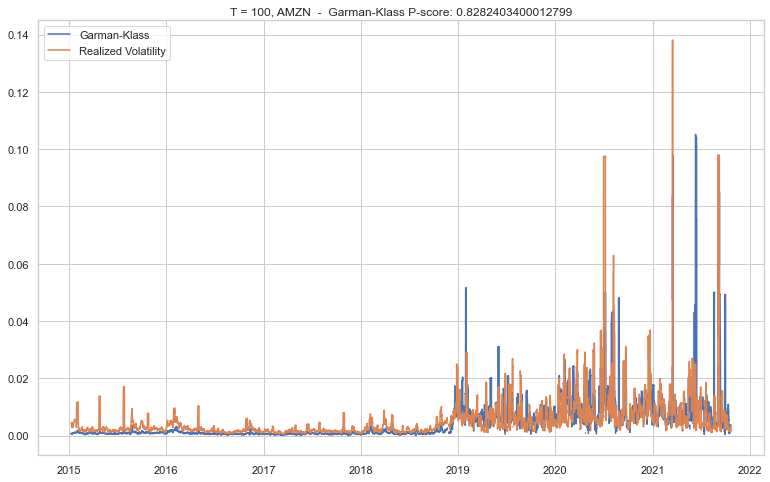

T = 100, H = 0.01, AMZN  -  RoughVolatility P-score: 0.6091579417831159


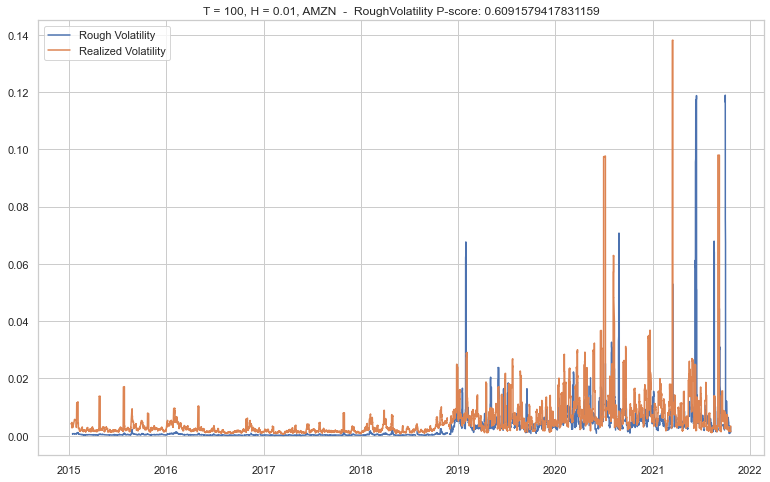

T = 100, H = 0.05, AMZN  -  RoughVolatility P-score: 1.0931523358491608


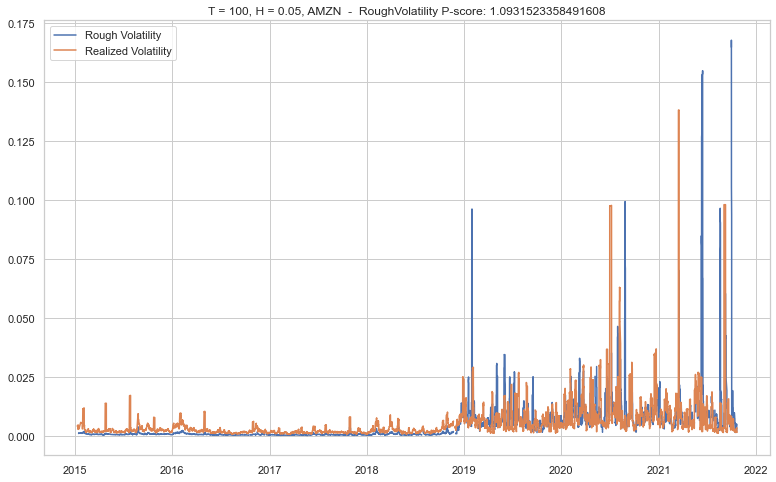

T = 100, H = 0.1, AMZN  -  RoughVolatility P-score: 2.367678517726007


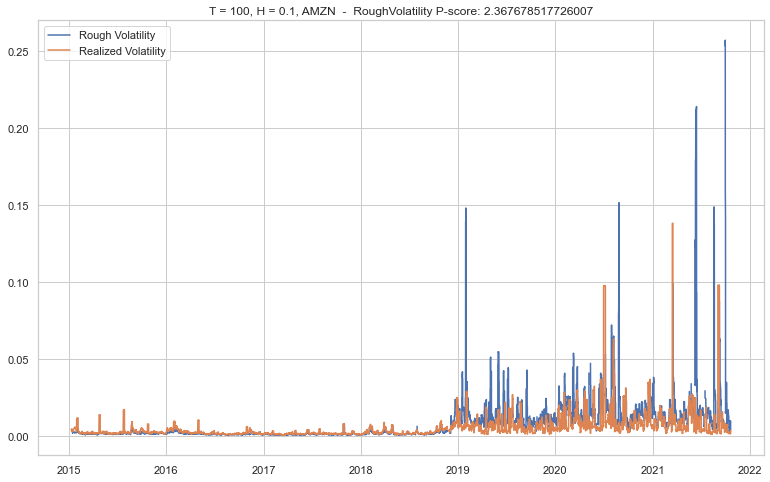

T = 100, H = 0.2, AMZN  -  RoughVolatility P-score: 11.471686579631411


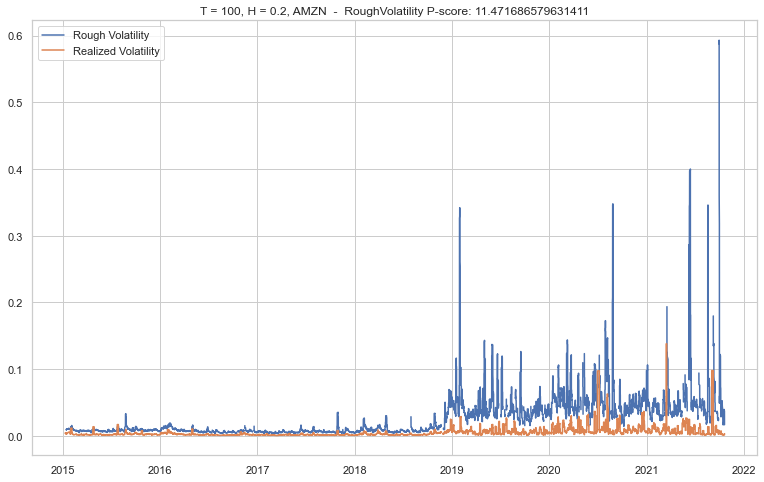

T = 100, H = 0.5, AMZN  -  RoughVolatility P-score: 2061.60958537952


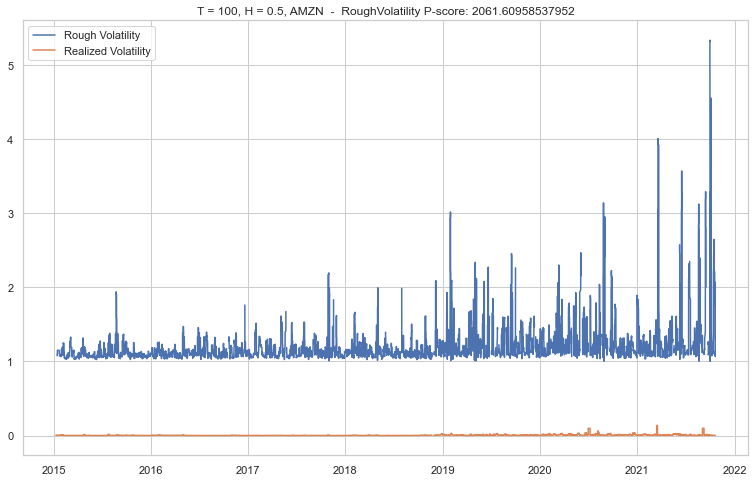

T = 100, H = 1, AMZN  -  RoughVolatility P-score: 1324788.4184574177


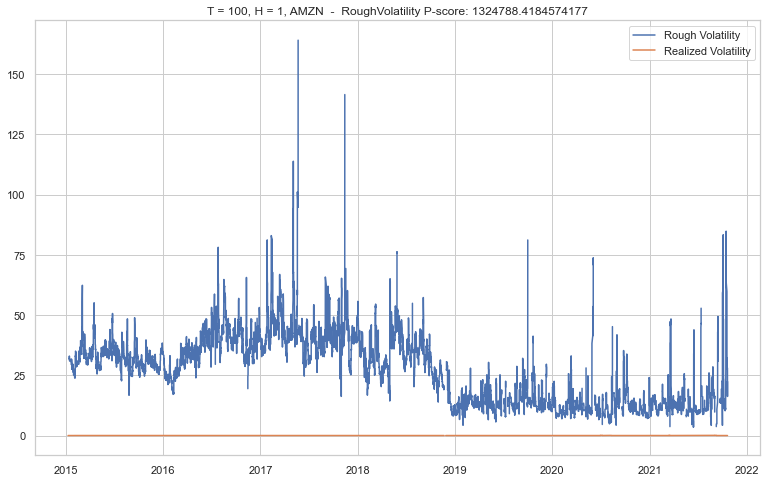

   Ticker    T Estimator     h       P-score
0     AAP  100       G-K     -  9.184599e-01
1     AAP  100     Rough  0.01  9.034642e-01
2     AAP  100     Rough  0.05  8.922629e-01
3     AAP  100     Rough   0.1  1.380145e+00
4     AAP  100     Rough   0.2  1.383392e+01
5     AAP  100     Rough   0.5  2.704398e+04
6     AAP  100     Rough     1  1.804291e+07
7     ABC  100       G-K     -  8.127599e-01
8     ABC  100     Rough  0.01  9.738035e-01
9     ABC  100     Rough  0.05  1.570957e+00
10    ABC  100     Rough   0.1  4.035404e+00
11    ABC  100     Rough   0.2  2.777118e+01
12    ABC  100     Rough   0.5  1.171620e+04
13    ABC  100     Rough     1  8.965873e+06
14   ACWI  100       G-K     -  7.979075e-01
15   ACWI  100     Rough  0.01  7.246093e-01
16   ACWI  100     Rough  0.05  6.851172e-01
17   ACWI  100     Rough   0.1  6.600406e-01
18   ACWI  100     Rough   0.2  8.371612e+00
19   ACWI  100     Rough   0.5  5.927429e+04
20   ACWI  100     Rough     1  1.788612e+08
21    AES 

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


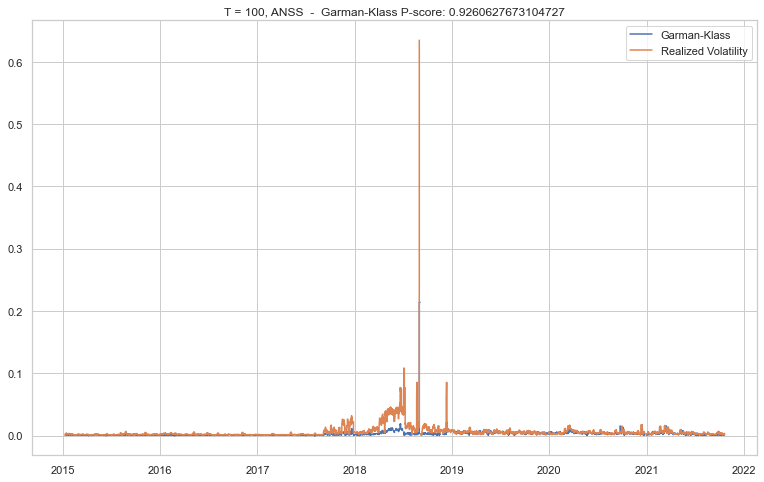

T = 100, H = 0.01, ANSS  -  RoughVolatility P-score: 0.11667347512706995


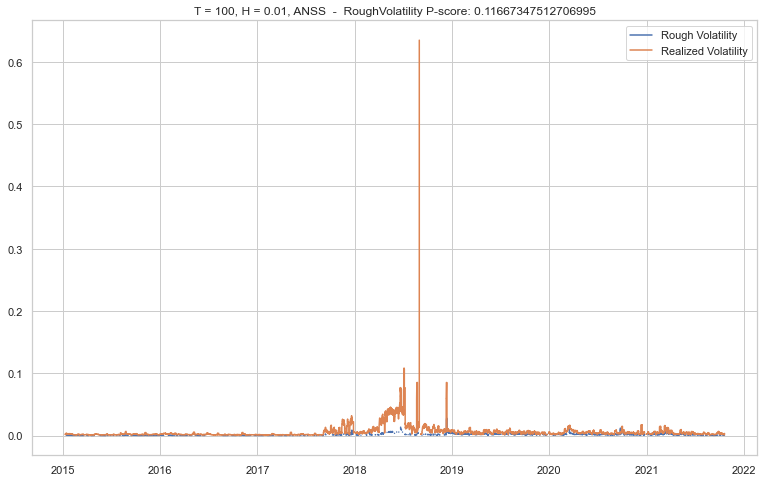

T = 100, H = 0.05, ANSS  -  RoughVolatility P-score: 0.10934070529474164


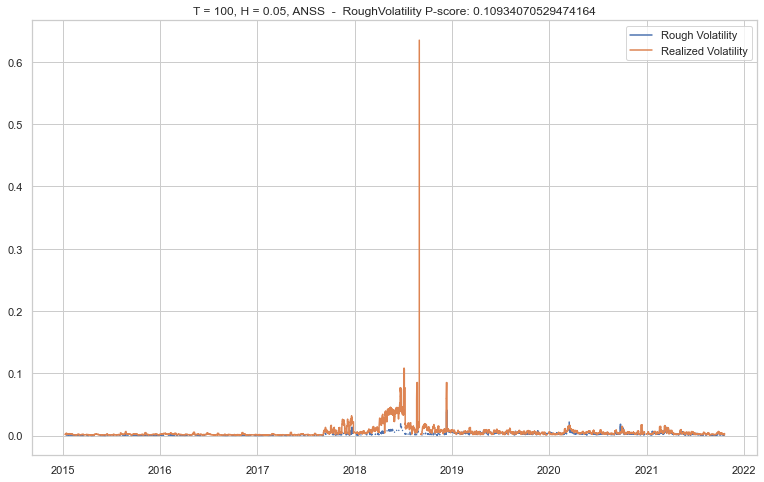

T = 100, H = 0.1, ANSS  -  RoughVolatility P-score: 0.08967321498319783


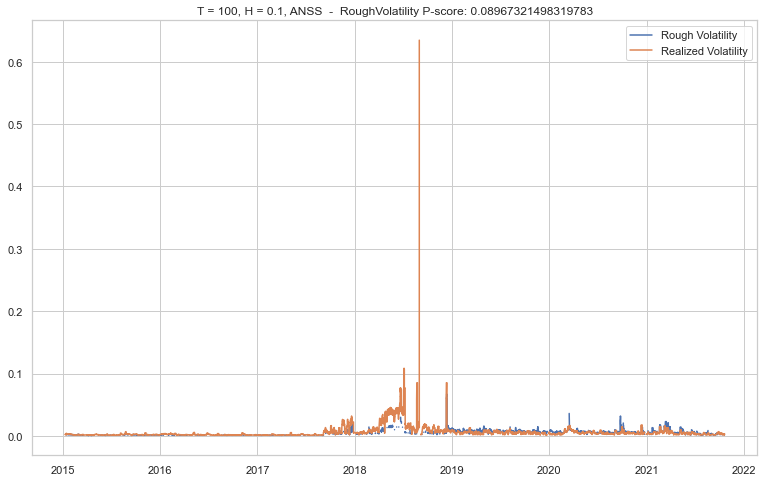

T = 100, H = 0.2, ANSS  -  RoughVolatility P-score: 0.3349533191789683


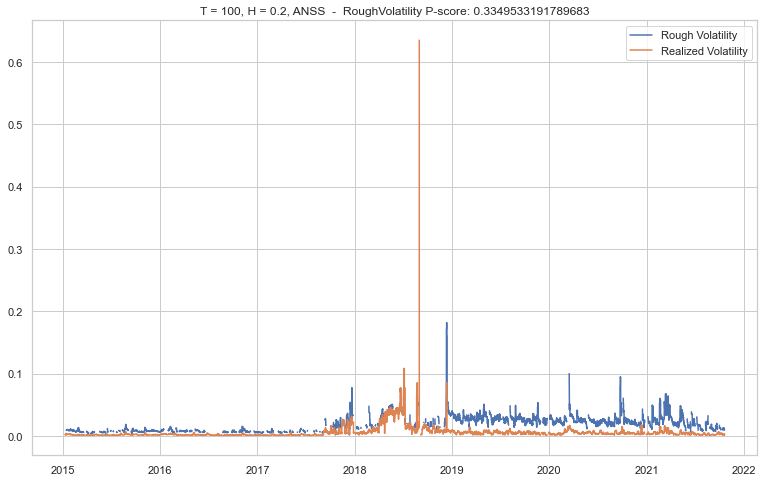

T = 100, H = 0.5, ANSS  -  RoughVolatility P-score: 448.5263177672841


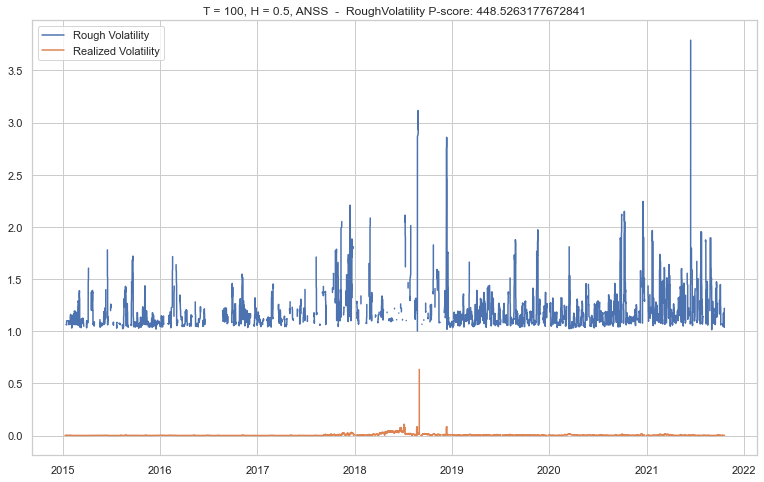

T = 100, H = 1, ANSS  -  RoughVolatility P-score: 471704.70367690676


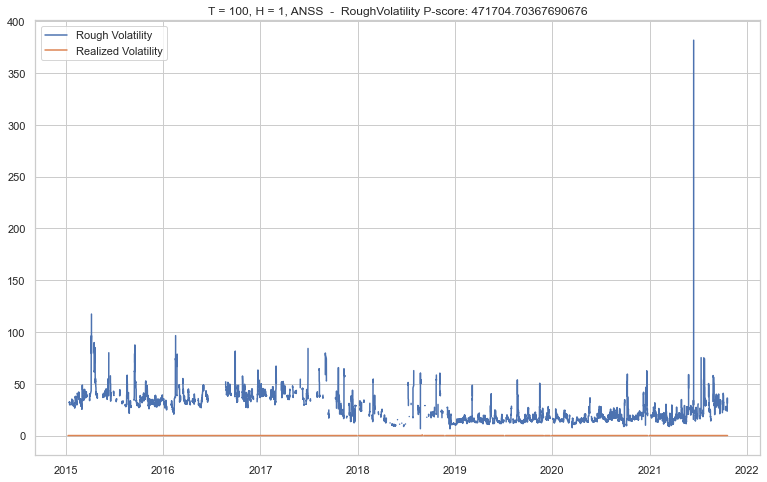

   Ticker    T Estimator     h        P-score
0     AAP  100       G-K     -       0.918460
1     AAP  100     Rough  0.01       0.903464
2     AAP  100     Rough  0.05       0.892263
3     AAP  100     Rough   0.1       1.380145
4     AAP  100     Rough   0.2      13.833917
..    ...  ...       ...   ...            ...
58   ANSS  100     Rough  0.05       0.109341
59   ANSS  100     Rough   0.1       0.089673
60   ANSS  100     Rough   0.2       0.334953
61   ANSS  100     Rough   0.5     448.526318
62   ANSS  100     Rough     1  471704.703677

[63 rows x 5 columns]
                    last_mkt ticker          trade_time     bid     ask  \
trade_time                                                                
2015-01-02 09:46:00     NYSE   ANTM 2015-01-02 09:46:00  126.68  126.80   
2015-01-02 09:56:00     NYSE   ANTM 2015-01-02 09:56:00  126.52  126.75   
2015-01-02 10:06:00     NYSE   ANTM 2015-01-02 10:06:00  126.71  126.78   
2015-01-02 10:16:00     NYSE   ANTM 2015-01-02 10:

C:\Users\giova\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


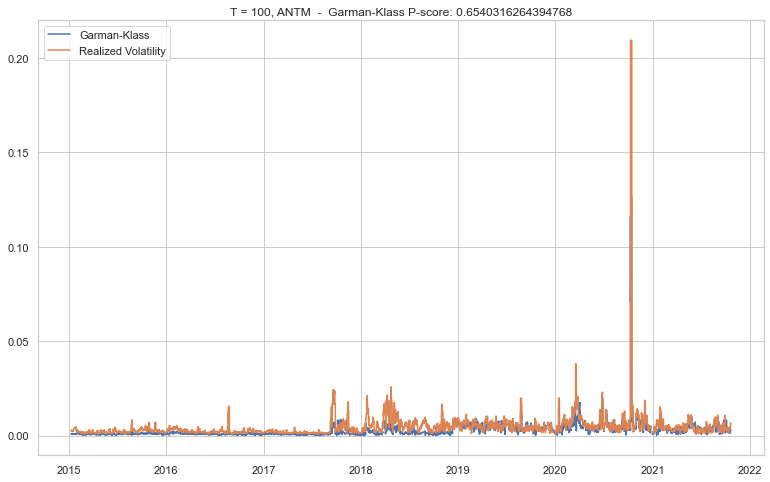

T = 100, H = 0.01, ANTM  -  RoughVolatility P-score: 0.9128826449105107


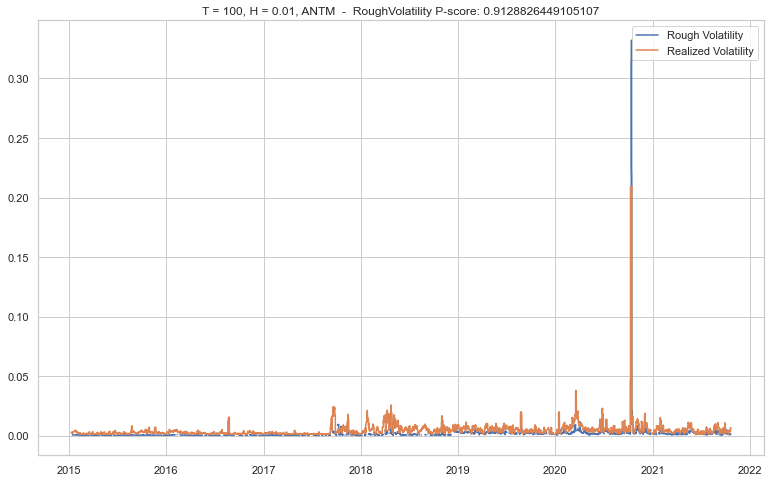

T = 100, H = 0.05, ANTM  -  RoughVolatility P-score: 2.113007809481045


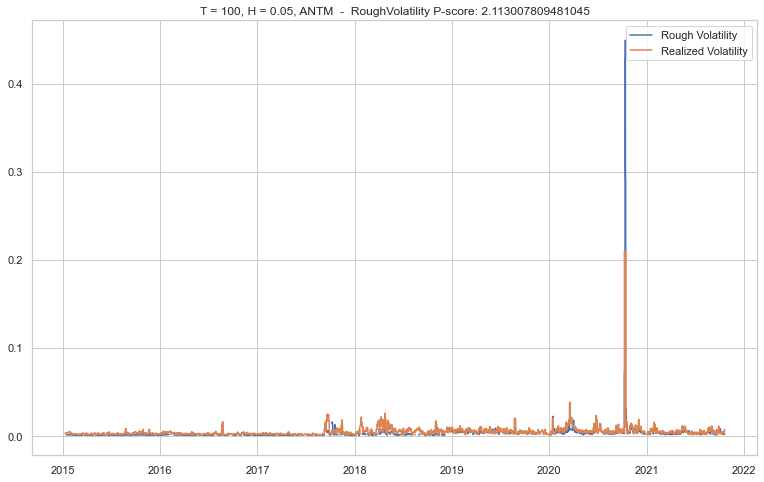

T = 100, H = 0.1, ANTM  -  RoughVolatility P-score: 5.147302735426013


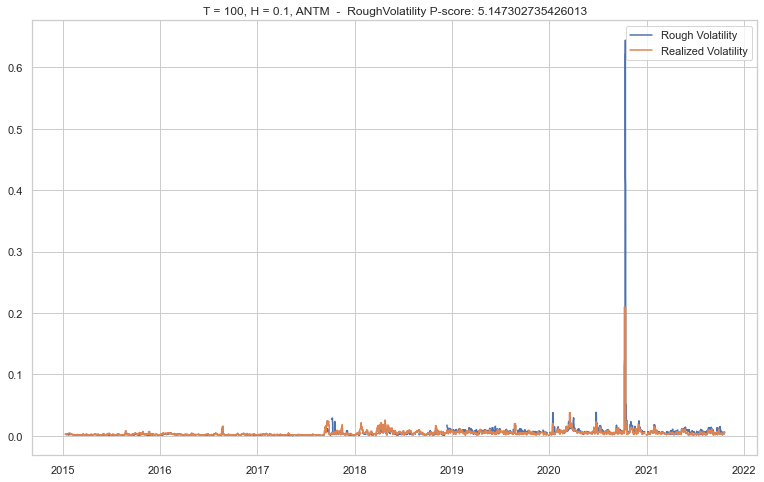

T = 100, H = 0.2, ANTM  -  RoughVolatility P-score: 22.043041854375268


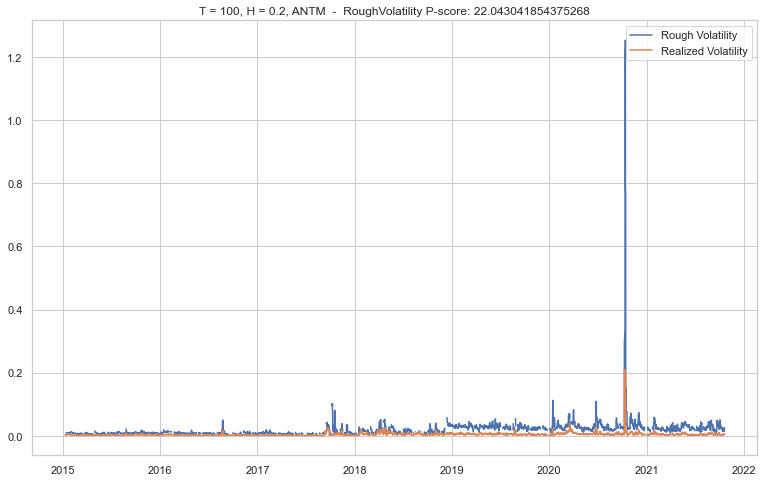

T = 100, H = 0.5, ANTM  -  RoughVolatility P-score: 1088.084964933168


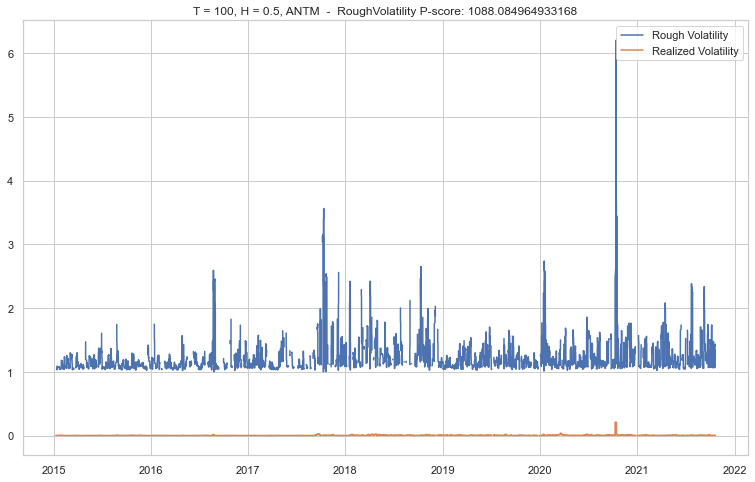

T = 100, H = 1, ANTM  -  RoughVolatility P-score: 681467.2504639279


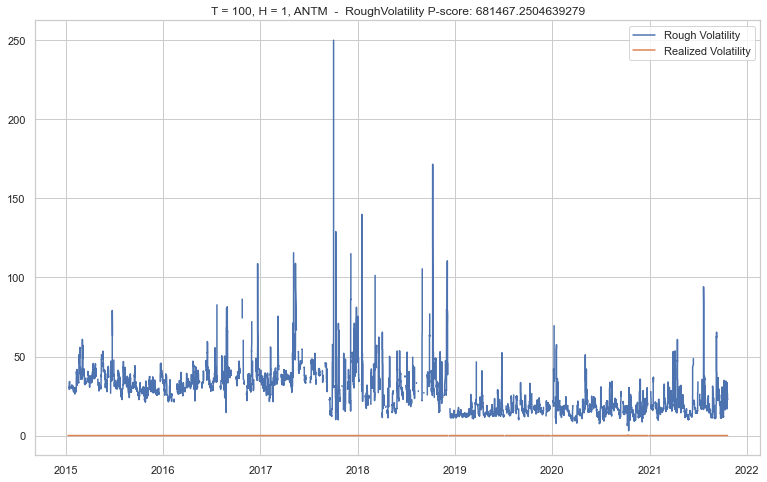

   Ticker    T Estimator     h        P-score
0     AAP  100       G-K     -       0.918460
1     AAP  100     Rough  0.01       0.903464
2     AAP  100     Rough  0.05       0.892263
3     AAP  100     Rough   0.1       1.380145
4     AAP  100     Rough   0.2      13.833917
..    ...  ...       ...   ...            ...
65   ANTM  100     Rough  0.05       2.113008
66   ANTM  100     Rough   0.1       5.147303
67   ANTM  100     Rough   0.2      22.043042
68   ANTM  100     Rough   0.5    1088.084965
69   ANTM  100     Rough     1  681467.250464

[70 rows x 5 columns]


In [4]:
def get_p(df_, intra_name):
    realized = df_["realized_var"]
    P = np.sqrt( ((realized**2 - df_[intra_name]**2)**2).sum() / ((realized**2-(realized**2).mean())**2).sum())
    return P 

result = pd.DataFrame(columns = ["Ticker", "T", "Estimator", "h", "P-score"])

for df_ in df:
    
    name_tick = df_.ticker.iloc[0]
    name.append(df_.ticker.iloc[0])
    df_["trade_time"] = pd.to_datetime(df_["trade_time"])
    df_ = df_.set_index(df_.trade_time)
    #print(df_)
    
    """  build mid price """
    df_["mid"] = 0.5 * ( df_["bid"] + df_["ask"] ) 
    

    """ rolling window over 10 minutes of the maximum   """
    df_["high_"] = df_.mid.rolling(5).max()
    df_["low_"] = df_.mid.rolling(5).min()
    
    """   keep every 5th observation   """
    df_ = (df_.iloc[0:len(df_):5])
    df_["prev_mid"] = df_.mid.shift(1)

    
    """   drop observation where ct and ct-1 are on different dates      """
    df_["previous_time"] = df_.trade_time.shift(1)
    rowtokeep = (df_['previous_time'].dt.day == df_['trade_time'].dt.day)
    df_ = df_.loc[rowtokeep]
    
    """ keep only observation where something happened """
    #df_ = df_.loc[(df_!=0).all(axis=1)]
    print(df_)
    """ Estimate the G-K intraday volatility measure"""
    df_["G-K"] = 0.5 * np.log(df_["high_"]/df_["low_"])**2 - (2*np.log(2)-1)*np.log(df_["mid"]/df_["prev_mid"])**2
    df_["G-K"].loc[df_["G-K"]>0]
    
    
    for t in [100]:
        
        """ realized variance """
        df_["realized_var"] = np.sqrt( (np.log(df_['mid']).diff()**2).rolling(t).mean())

        """ Garman Klass """
        df_[f"G-K-{t}"] = (df_["G-K"].rolling(t).mean().pow(0.5)).dropna()
        
        """ Estimate the Q """
        df_[f"Q_{t}"] = (np.log(df_[f"G-K-{t}"] ** 2)).rolling(t).std()
        lag = 1
        df_[f"var_hat-{t}"] = lag * df_[f"G-K-{t}"].shift(lag)
    
        """ Compute the P-Score for the G-K Volatility"""
        var_hat_p = get_p(df_, f"var_hat-{t}")
        print(f"T = {t}, {name_tick}  -  Garman-Klass P-score: {var_hat_p}")
        result.loc[len(result)] = [name_tick, t, "G-K", "-", var_hat_p]
        plt.plot(df_[f"var_hat-{t}"], label = "Garman-Klass")
        plt.plot(df_["realized_var"], label = "Realized Volatility")
        plt.legend()
        plt.title(f"T = {t}, {name_tick}  -  Garman-Klass P-score: {var_hat_p}")
        plt.show()
        
        H = [0.01,0.05,0.1,0.2,0.5,1]
        
        for h in H: 
            df_[f"rough-{t}-{h}"] = get_rough(h, df_[f"G-K-{t}"], 1)
            df_[f"rough-{t}-{h}"] = df_[f"rough-{t}-{h}"].dropna()
            df_[f"MGF-{t}-{h}"] = np.exp(df_[f"rough-{t}-{h}"] + 0.5 * df_[f"Q_{t}"]).pow(1)
            df_[f"MGF-{t}-{h}"] = df_[f"MGF-{t}-{h}"].loc[df_[f"MGF-{t}-{h}"] > 0]
            
            """ Compute the P-Score for the Rough Volatility"""
            var_mgf_p = get_p(df_, f"MGF-{t}-{h}")
            print(f"T = {t}, H = {h}, {name_tick}  -  RoughVolatility P-score: {var_mgf_p}")
            result.loc[len(result)] = [name_tick, t, "Rough", h, var_mgf_p]
            plt.plot(df_[f"MGF-{t}-{h}"], label = "Rough Volatility")
            plt.plot(df_["realized_var"], label = "Realized Volatility")
            plt.legend()
            plt.title(f"T = {t}, H = {h}, {name_tick}  -  RoughVolatility P-score: {var_mgf_p}")
            plt.show()
        
        print(result)
        
        

In [5]:
result.to_csv("resultrough.csv")

In [6]:
result

Ticker    T Estimator     h        P-score
0     AAP  100       G-K     -       0.918460
1     AAP  100     Rough  0.01       0.903464
2     AAP  100     Rough  0.05       0.892263
3     AAP  100     Rough   0.1       1.380145
4     AAP  100     Rough   0.2      13.833917
..    ...  ...       ...   ...            ...
65   ANTM  100     Rough  0.05       2.113008
66   ANTM  100     Rough   0.1       5.147303
67   ANTM  100     Rough   0.2      22.043042
68   ANTM  100     Rough   0.5    1088.084965
69   ANTM  100     Rough     1  681467.250464

[70 rows x 5 columns]